In [9]:
# Functions for Substring Operations: Adjusting Comment Character Length to
# 80 Characters

standard_comment_length <- function(cmt) {
    cmt <- str_trim(cmt)
    trail_under_score <-  "----------------------------------------------------------------------"
    full_comment <- paste("# ", cmt, trail_under_score)
    standardized_cmt <- str_sub(full_comment, 1, 80)
    return(standardized_cmt)
}

standard_comment_length('View the structure of the dataset')


[1] "#  View the structure of the dataset -------------------------------------------"

In [2]:
# FITE7410 Financial Fraud Analytics First Semester, 2025-2026 -----------------
# Assignnment 1 Exploratory Data Analysis (EDA)
# Student: Choi Chi For 3036384024
# Due Date: 19 Oct, 2025 (Sun) 23:59
# Objective of this assignment:
# 1. Perform data cleaning and preparation
# 2. Explore and visualize the data to identify patterns and trends
# 3. Engineer new features based on domain knowledge or insights from EDA
# 4. Prepare a report summarizing the findings from EDA

# Load necessary libraries with improved error handling ------------------
.libPaths(Sys.getenv("R_LIBS_USER"))
dir.create(Sys.getenv("R_LIBS_USER"), recursive = TRUE, showWarnings = FALSE)

# Install essential packages individually to avoid tidyverse dependencies
essential_packages <- c("dplyr", "tidyr", "ggplot2", "corrplot", "stringr")

cat("Installing essential R packages...\n")
for (pkg in essential_packages) {
  if (!require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat("Installing", pkg, "...\n")
    install.packages(pkg, lib = Sys.getenv("R_LIBS_USER"), 
                     repos = "https://cran.r-project.org", 
                     dependencies = TRUE)
  }
}

# Load libraries with suppressed startup messages
suppressPackageStartupMessages({
  library(dplyr, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(tidyr, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(ggplot2, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(corrplot, lib.loc = Sys.getenv("R_LIBS_USER"))
  library(stringr, lib.loc = Sys.getenv("R_LIBS_USER"))
})

cat("✓ Essential packages loaded successfully!\n")
cat("Note: Using individual packages instead of full tidyverse to avoid system dependency issues.\n")

Installing essential R packages...
✓ Essential packages loaded successfully!
Note: Using individual packages instead of full tidyverse to avoid system dependency issues.


In [46]:
#  Load data -------------------------------------------------------------------
tryCatch({
  data <- data.frame(read.csv("A1_data.csv"))
}, warning = function(w) {
  
  print(w)
}, error = function(e) {
  print(e)
}, finally = {
print("Data loading attempt finished.")
})

head(data, n = 20)


[1] "Data loading attempt finished."


,TxnID,isFraud,TxnDT,TxnDTHour,TxnAmt,ProductCD,addr1,addr2,dist1,dist2,⋯,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DevType,DevInfo
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<lgl>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
1,2987004,0,86506,24,82.90000,TP,402,73,NA,NA,⋯,samsung browser 6.2,32,2220x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SAMSUNG SM-G892A Build/NRD90M
2,2987011,0,86555,24,27.28170,LY,NA,NA,NA,30,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,
3,2987016,0,86620,24,49.70000,TP,152,73,NA,NA,⋯,chrome 62.0,24,1280x800,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,MacOS
4,2987022,0,86786,24,82.90000,TP,281,73,NA,NA,⋯,,NA,,,NA,NA,NA,NA,,
5,2987038,0,87172,24,41.40000,AD,312,73,NA,98,⋯,chrome 62.0,32,1920x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,
6,2987040,0,87209,24,125.87242,LY,NA,NA,NA,NA,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,Windows
7,2987048,0,87317,24,70.10804,LY,NA,NA,NA,NA,⋯,chrome 62.0,NA,,,FALSE,FALSE,TRUE,TRUE,desktop,Windows
8,2987057,0,87445,24,82.90000,TP,186,73,NA,NA,⋯,chrome 62.0 for android,32,1920x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SM-G930V Build/NRD90M
9,2987069,0,87725,24,33.10000,AD,312,73,NA,84,⋯,chrome 62.0,32,1920x1080,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,


In [47]:
#  View summary statistics of the dataset --------------------------------------
summary(data)

     TxnID            isFraud           TxnDT            TxnDTHour   
 Min.   :2987004   Min.   :0.0000   Min.   :   86506   Min.   :  24  
 1st Qu.:3078716   1st Qu.:0.0000   1st Qu.: 1900286   1st Qu.: 527  
 Median :3203512   Median :0.0000   Median : 5031202   Median :1397  
 Mean   :3238037   Mean   :0.1132   Mean   : 6209720   Mean   :1724  
 3rd Qu.:3393812   3rd Qu.:0.0000   3rd Qu.:10272711   3rd Qu.:2853  
 Max.   :3577534   Max.   :1.0000   Max.   :15811030   Max.   :4391  
                                                                     
     TxnAmt           ProductCD             addr1           addr2       
 Min.   :   0.3515   Length:100000      Min.   : 82.0   Min.   : 18.00  
 1st Qu.:  42.0955   Class :character   1st Qu.:186.0   1st Qu.: 73.00  
 Median :  82.9000   Mode  :character   Median :281.0   Median : 73.00  
 Mean   : 138.7709                      Mean   :278.6   Mean   : 73.01  
 3rd Qu.: 165.9000                      3rd Qu.:312.0   3rd Qu.: 73.00  
 M


     0      1 
88.682 11.318 

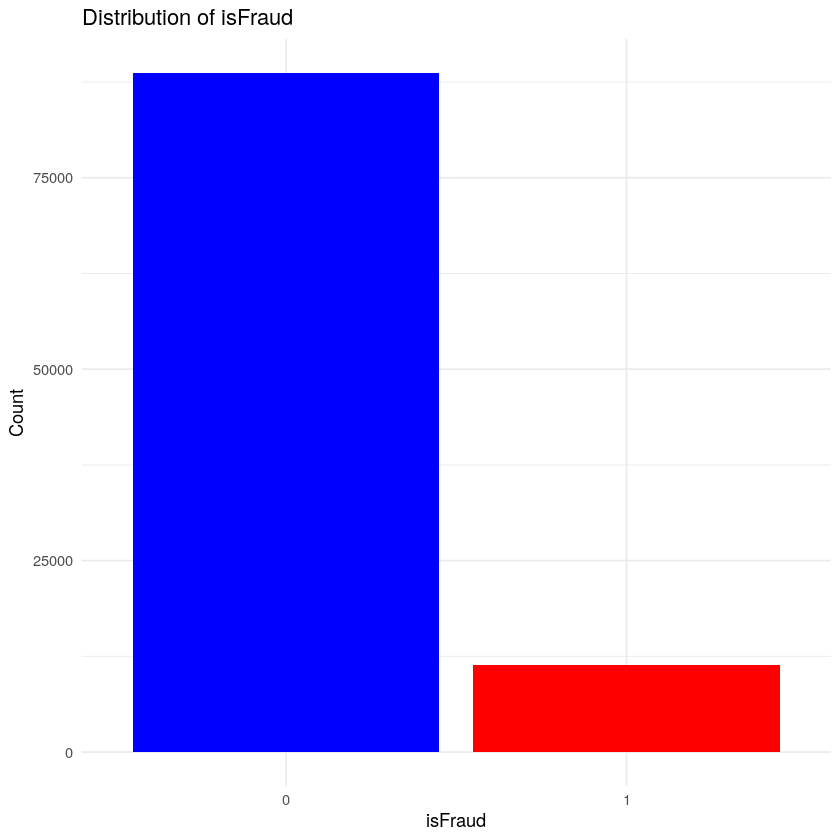

In [48]:
# view the percentage of isFraud in the dataset --------------------------------------
table(data$isFraud) / nrow(data) * 100

# visualize the distribution of isFraud --------------------------------------
ggplot(data, aes(x = factor(isFraud))) +
  geom_bar(fill = c("blue", "red")) +
  labs(title = "Distribution of isFraud", x = "isFraud", y = "Count") +
  theme_minimal()   

In [49]:
# View the percentage of missing values in column with numeric value ----------------------------
numeric_cols <- sapply(data, is.numeric)
missing_percentage <- sapply(data[, numeric_cols], function(x) {
  sum(is.na(x)) / length(x) * 100
})
missing_percentage <- data.frame(missing_percentage[missing_percentage > 0])

# View the percentage of the value = "" in the column with character value ----------------------------
char_cols <- sapply(data, is.character)
empty_string_percentage <- sapply(data[, char_cols], function(x) {
  sum(x == "", na.rm = TRUE) / length(x) * 100
})
empty_string_percentage <- data.frame(empty_string_percentage[empty_string_percentage > 0])

# Fix: Ensure both data frames have the same column structure
missing_data_summary <- data.frame()

# Add missing values data if any exist
if(nrow(missing_percentage) > 0) {
  missing_df <- data.frame(
    Metric = "Missing Values (%)",
    Column = rownames(missing_percentage),
    Percentage = missing_percentage[,1]
  )
  missing_data_summary <- rbind(missing_data_summary, missing_df)
}

# Add empty strings data if any exist
if(nrow(empty_string_percentage) > 0) {
  empty_df <- data.frame(
    Metric = "Empty Strings (%)",
    Column = rownames(empty_string_percentage),
    Percentage = empty_string_percentage[,1]
  )
  missing_data_summary <- rbind(missing_data_summary, empty_df)
}

# Set proper row names
rownames(missing_data_summary) <- NULL
print(missing_data_summary)


               Metric        Column Percentage
1  Missing Values (%)         addr1     42.881
2  Missing Values (%)         addr2     42.881
3  Missing Values (%)         dist2     73.694
4  Missing Values (%)         card2      0.688
5  Missing Values (%)         card3      0.115
6  Missing Values (%)         card5      0.660
7  Missing Values (%)            D1      0.155
8  Missing Values (%)            D2     78.733
9  Missing Values (%)            D3     79.692
10 Missing Values (%)            D4     54.271
11 Missing Values (%)            D5     76.124
12 Missing Values (%)            D6     52.588
13 Missing Values (%)            D7     74.148
14 Missing Values (%)            D8     47.606
15 Missing Values (%)            D9     47.606
16 Missing Values (%)           D10     51.253
17 Missing Values (%)           D12     58.199
18 Missing Values (%)           D13     56.376
19 Missing Values (%)           D14     56.054
20 Missing Values (%)           D15     51.915
21 Missing Va

In [50]:
# Select the column with the percentage of missing values is less than 50% ----------------------------
cols_to_keep <- setdiff(names(data), missing_data_summary$Column[missing_data_summary$Percentage > 50])
data <- data[, cols_to_keep]
data


TxnID,isFraud,TxnDT,TxnDTHour,TxnAmt,ProductCD,addr1,addr2,dist1,card1,⋯,id_30,id_31,id_32,id_34,id_35,id_36,id_37,id_38,DevType,DevInfo
<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<lgl>,<int>,⋯,<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
2987004,0,86506,24,82.90000,TP,402,73,NA,4497,⋯,Android,samsung browser 6.2,32,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SAMSUNG SM-G892A Build/NRD90M
2987011,0,86555,24,27.28170,LY,NA,NA,NA,4461,⋯,,chrome 62.0,NA,,FALSE,FALSE,TRUE,TRUE,desktop,
2987016,0,86620,24,49.70000,TP,152,73,NA,1790,⋯,Mac,chrome 62.0,24,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,MacOS
2987022,0,86786,24,82.90000,TP,281,73,NA,1724,⋯,,,NA,,NA,NA,NA,NA,,
2987038,0,87172,24,41.40000,AD,312,73,NA,5463,⋯,Android,chrome 62.0,32,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,
2987040,0,87209,24,125.87242,LY,NA,NA,NA,13329,⋯,,chrome 62.0,NA,,FALSE,FALSE,TRUE,TRUE,desktop,Windows
2987048,0,87317,24,70.10804,LY,NA,NA,NA,15885,⋯,,chrome 62.0,NA,,FALSE,FALSE,TRUE,TRUE,desktop,Windows
2987057,0,87445,24,82.90000,TP,186,73,NA,11839,⋯,Android,chrome 62.0 for android,32,match_status:2,TRUE,FALSE,TRUE,TRUE,mobile,SM-G930V Build/NRD90M
2987069,0,87725,24,33.10000,AD,312,73,NA,12866,⋯,Linux,chrome 62.0,32,match_status:2,TRUE,FALSE,TRUE,TRUE,desktop,


In [14]:
# view the unique values in each column ----------------------------------------------
unique_values <- sapply(data, function(x) length(unique(x)))
unique_values <- data.frame(Variable = names(unique_values), Unique_Values = unique_values)
print(unique_values)

                   Variable Unique_Values
TxnID                 TxnID        100000
isFraud             isFraud             2
TxnDT                 TxnDT         99292
TxnDTHour         TxnDTHour          4193
TxnAmt               TxnAmt          6803
ProductCD         ProductCD             4
dist1                 dist1             1
card1                 card1          7337
card2                 card2           473
card3                 card3            96
card4                 card4             5
card5                 card5           100
card6                 card6             4
P_emaildomain P_emaildomain            10
R_emaildomain R_emaildomain            10
C1                       C1          1291
C2                       C2          1060
C3                       C3            18
C4                       C4           960
C5                       C5             1
C6                       C6           962
C7                       C7           783
C8                       C8       

In [51]:
# transform the data in columns with character value == "" to "unknown" ----------------------------
data[data == ""] <- "unknown"

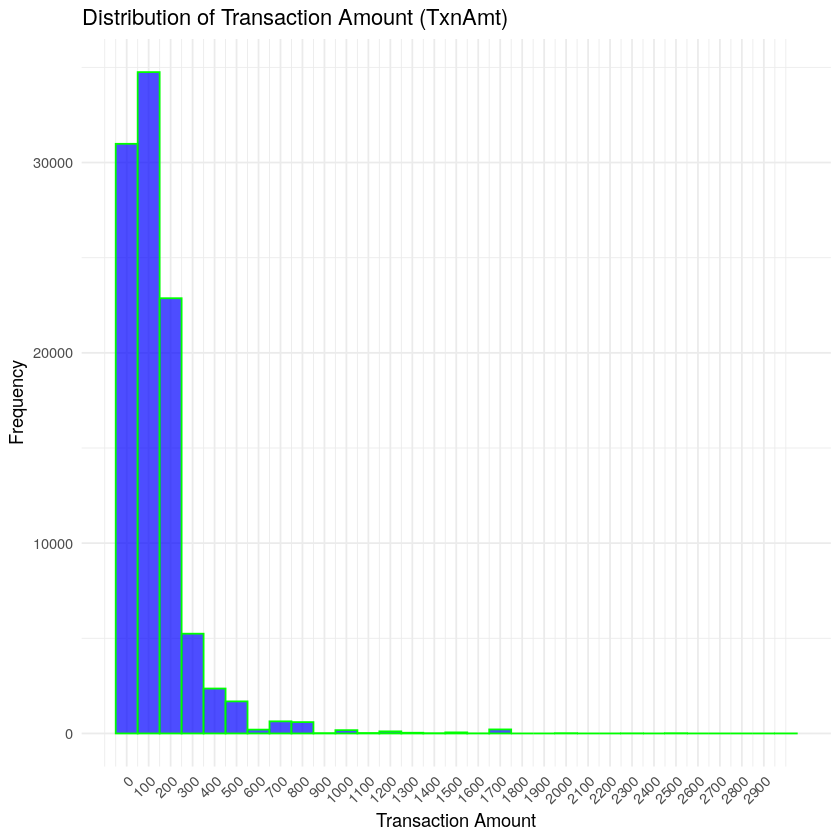

In [52]:
# view the distribution of TxnAmt ------------------------------------------------
ggplot(data, aes(x = TxnAmt)) +
  geom_histogram(binwidth = 100, fill = "blue", color = "green", alpha = 0.7) +
  labs(title = "Distribution of Transaction Amount (TxnAmt)", x = "Transaction Amount", y = "Frequency") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

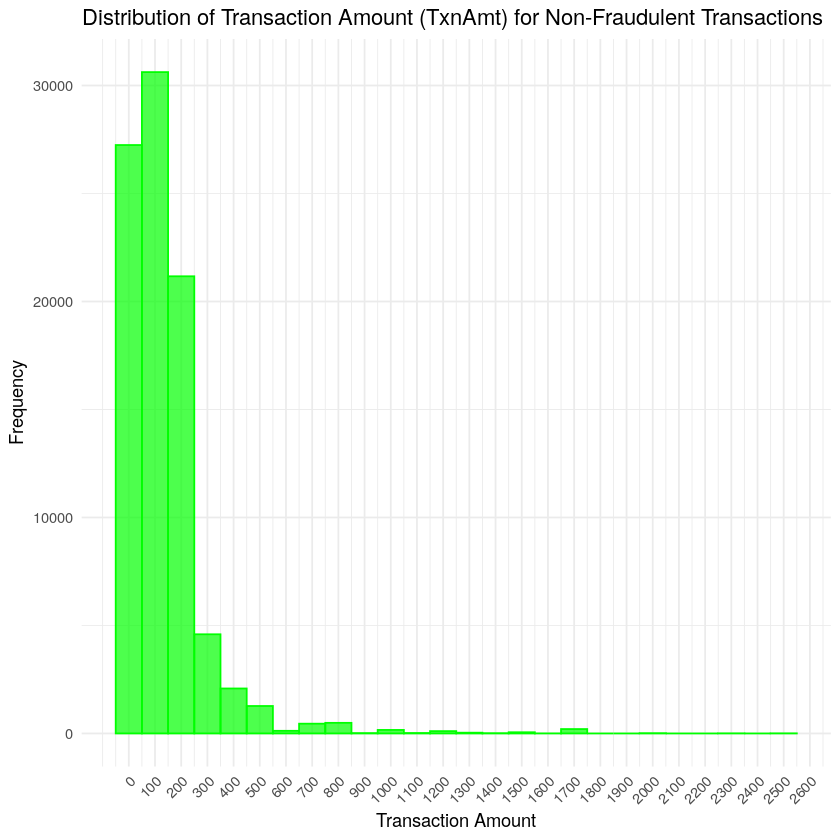

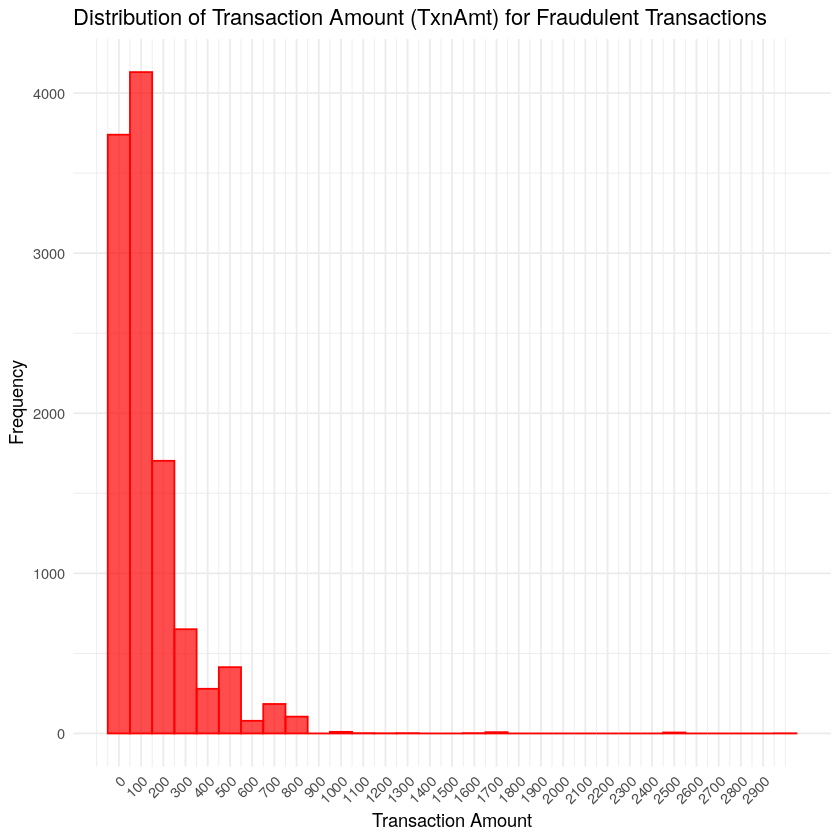

In [53]:
# view the distribution of TxnAmt group by isFraud == 0 and x tick size = 100 and font direction is diagonal--------------------------------------------------
ggplot(data %>% filter(isFraud == 0), aes(x = TxnAmt)) +
  geom_histogram(binwidth = 100, fill="green", color = "green", alpha = 0.7) +
  labs(title = "Distribution of Transaction Amount (TxnAmt) for Non-Fraudulent Transactions", x = "Transaction Amount", y = "Frequency") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

  # view the distribution of TxnAmt group by isFraud == 1 and x tick size = 100 and font direction is diagonal-------------------------------------------------
ggplot(data %>% filter(isFraud == 1), aes(x = TxnAmt)) +
  geom_histogram(binwidth = 100, fill="red", color = "red", alpha = 0.7) +
  labs(title = "Distribution of Transaction Amount (TxnAmt) for Fraudulent Transactions", x = "Transaction Amount", y = "Frequency") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


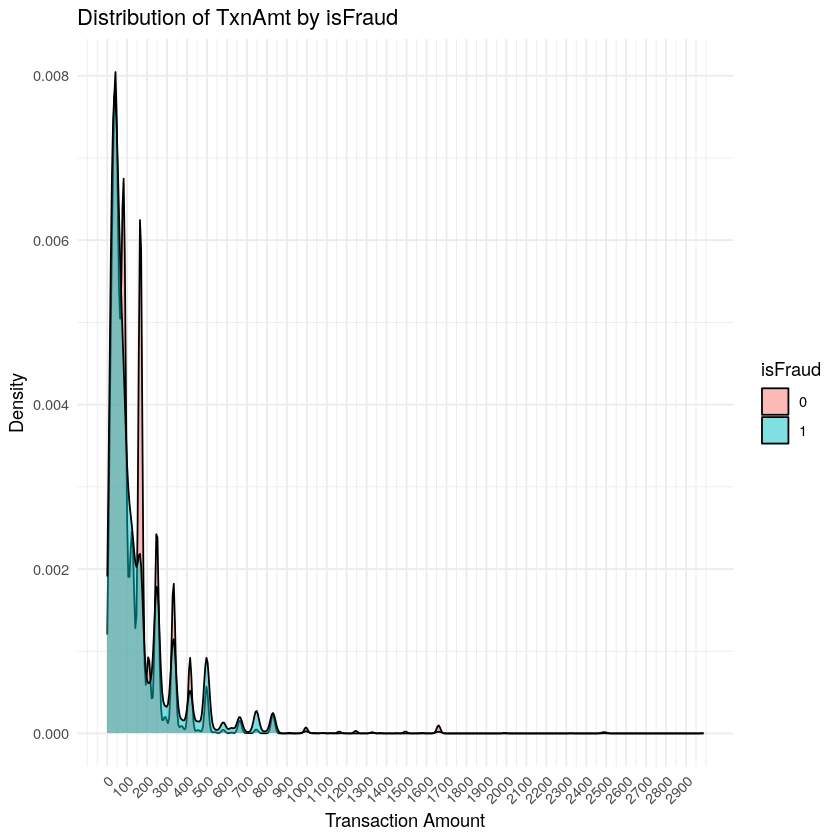

In [54]:
# view the distribution of TxnAmt group by isFraud == 0 and isFraud == 1 and bandwidth = 100 ------------------------------------------------
library(ggplot2)
ggplot(data, aes(x = TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of TxnAmt by isFraud",
       x = "Transaction Amount",
       y = "Density",
       fill = "isFraud") +
  theme_minimal()  +
  scale_x_continuous(breaks = seq(0, max(data$TxnAmt, na.rm = TRUE), by = 100)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

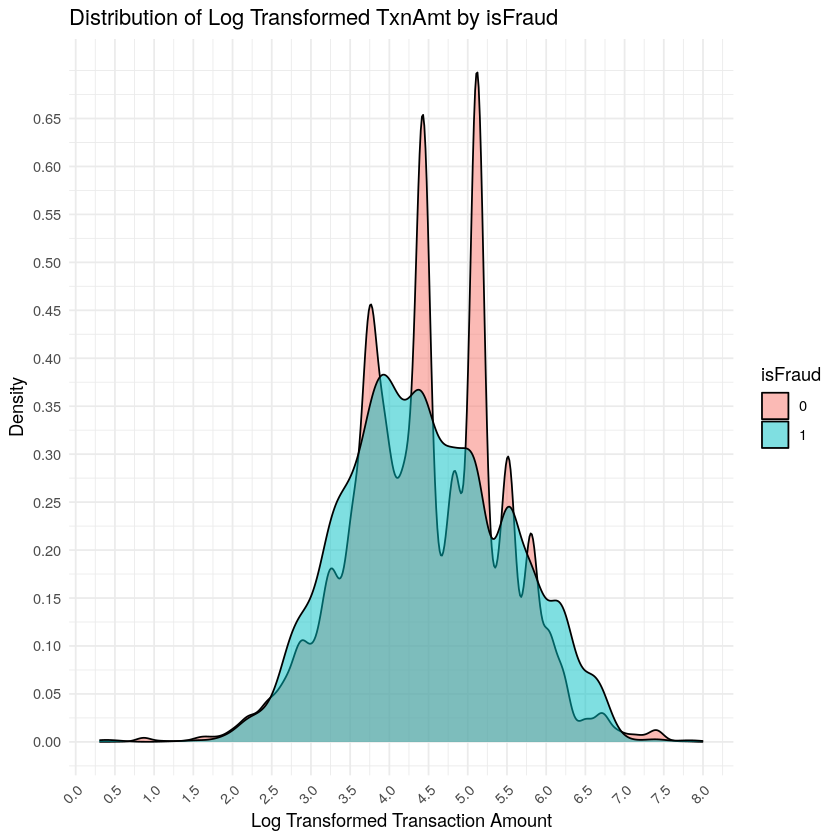

In [55]:
# view the log transformation of TxnAmt and y tick size = 0.05 and  x tick size = 0.5 ------------------------------------------------
data <- data %>% mutate(Log_TxnAmt = log(TxnAmt + 1))  # Adding 1 to avoid log(0) 

ggplot(data, aes(x = Log_TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Log Transformed TxnAmt by isFraud",
       x = "Log Transformed Transaction Amount", 
       y = "Density",
       fill = "isFraud") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(0, max(data$Log_TxnAmt, na.rm = TRUE), by = 0.5)) +     
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  +
  scale_y_continuous(breaks = seq(0, max(ggplot_build(ggplot(data, aes(x = Log_TxnAmt, fill = factor(isFraud))) +
  geom_density(alpha = 0.5))$data[[1]]$density, na.rm = TRUE), by = 0.05))

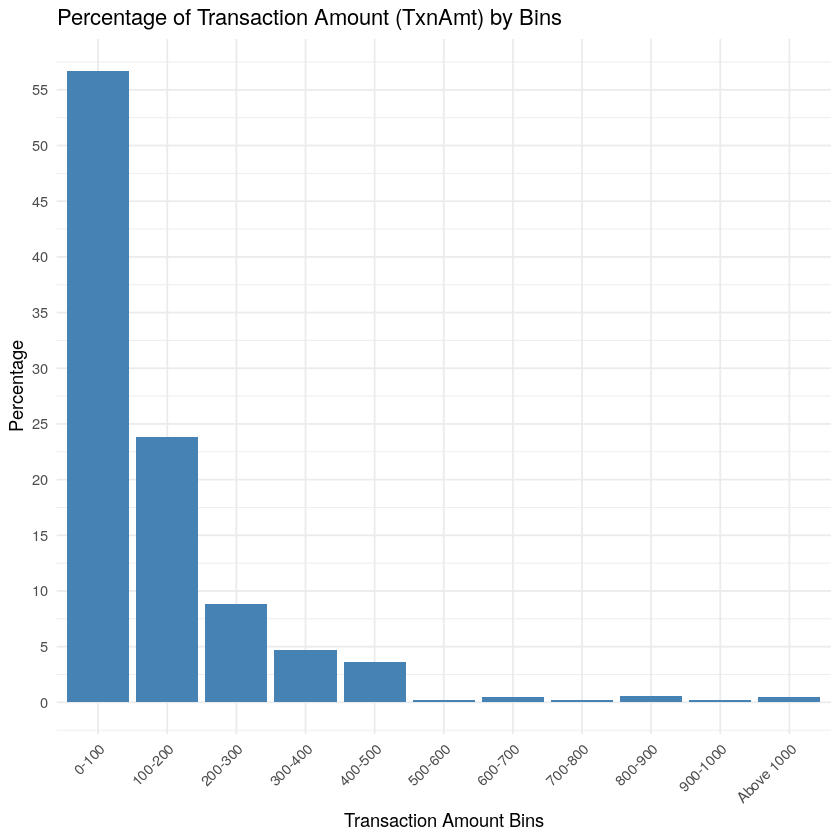

In [56]:
# view the percentage of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000  -----------------------------------------------    
original_data <- data

data <- data %>%
  mutate(TxnAmt_Bin = case_when(
    TxnAmt <= 100 ~ "0-100",
    TxnAmt <= 200 ~ "100-200",
    TxnAmt <= 300 ~ "200-300",
    TxnAmt <= 400 ~ "300-400",
    TxnAmt <= 500 ~ "400-500",
    TxnAmt <= 600 ~ "500-600",
    TxnAmt <= 700 ~ "600-700",
    TxnAmt <= 800 ~ "700-800",
    TxnAmt <= 900 ~ "800-900",
    TxnAmt <= 1000 ~ "900-1000",
    TRUE ~ "Above 1000"
  )) %>%
  group_by(TxnAmt_Bin) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)

  # visualize the percentage of TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 -----------------------------------------------
ggplot(data, aes(x = TxnAmt_Bin, y = Percentage)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Percentage of Transaction Amount (TxnAmt) by Bins", x = "Transaction Amount Bins", y = "Percentage") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, max(data$Percentage, na.rm = TRUE), by = 5))

  # Restore original data for next analysis
data <- original_data

`summarise()` has grouped output by 'TxnAmt_Bin'. You can override using the
`.groups` argument.


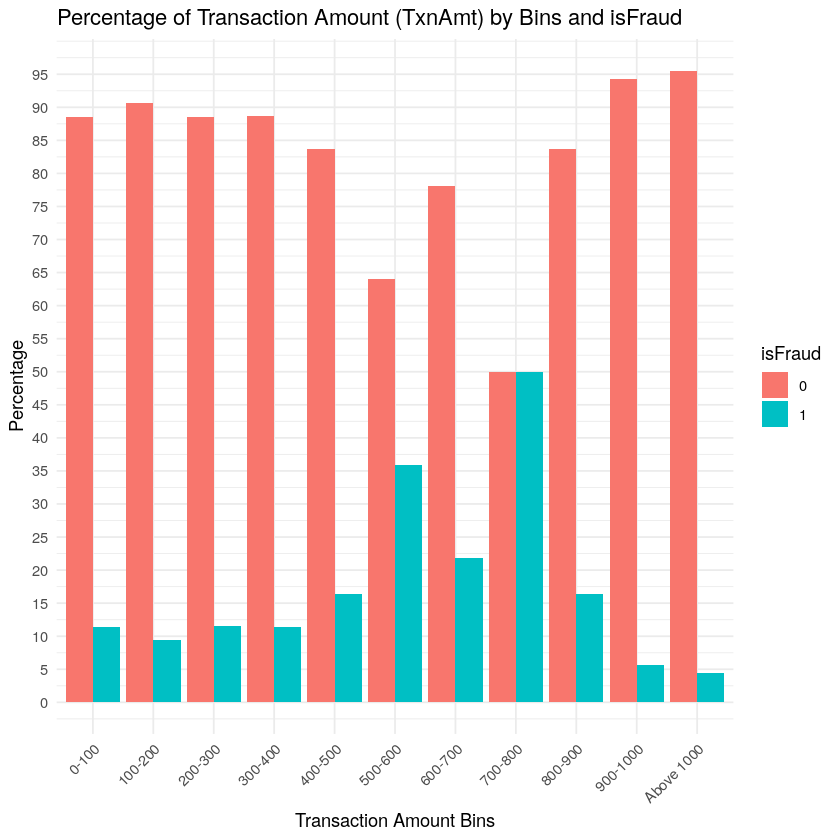

In [57]:
# view TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 group by isFraud and non-fraud ------------------------------------------------
original_data <- data
data <- data %>%
  mutate(TxnAmt_Bin = case_when(
    TxnAmt <= 100 ~ "0-100",
    TxnAmt <= 200 ~ "100-200",
    TxnAmt <= 300 ~ "200-300",
    TxnAmt <= 400 ~ "300-400",
    TxnAmt <= 500 ~ "400-500",
    TxnAmt <= 600 ~ "500-600",
    TxnAmt <= 700 ~ "600-700",
    TxnAmt <= 800 ~ "700-800",
    TxnAmt <= 900 ~ "800-900",
    TxnAmt <= 1000 ~ "900-1000",
    TRUE ~ "Above 1000"
  )) %>%
  group_by(TxnAmt_Bin, isFraud) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = (Count / sum(Count)) * 100)

# visualize TxnAmt with interval of 0-100, 100-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-900, 900-1000 and above 1000 group by isFraud and non-fraud -----------------------------------------------
ggplot(data, aes(x = TxnAmt_Bin, y = Percentage, fill = factor(isFraud))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Percentage of Transaction Amount (TxnAmt) by Bins and isFraud", 
       x = "Transaction Amount Bins", 
       y = "Percentage",
       fill = "isFraud") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, max(data$Percentage, na.rm = TRUE), by = 5))

  # Restore original data for next analysis
data <- original_data

In [58]:
# Convert TxnDT to DateTime format and extract useful features ----------------------------
data <- data %>% mutate(TxnDT = as.POSIXct(TxnDT, origin = "1970-01-01", tz = "UTC"))
data <- data %>% mutate(TransactionHour = as.numeric(format(TxnDT, "%H")),
                        TransactionDay = as.numeric(format(TxnDT, "%d")),
                        TransactionMonth = as.numeric(format(TxnDT, "%m")),
                        TransactionWeekday = as.numeric(format(TxnDT, "%u")))  # 1 = Monday, 7 = Sunday    

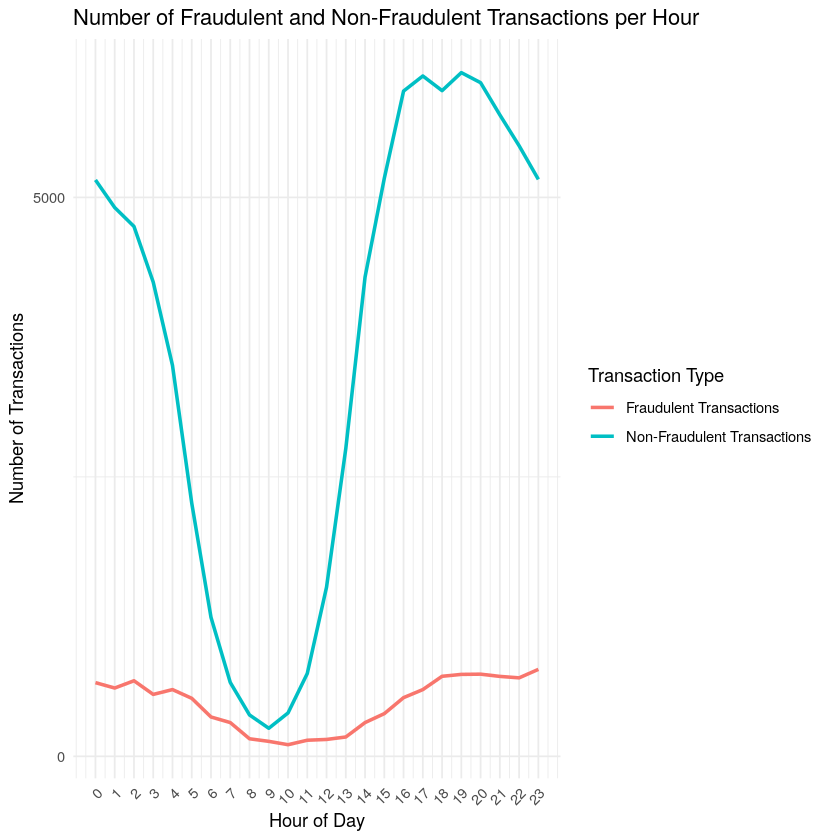

In [59]:
# count the number of transactions per hour ----------------------------------------------
transactions_per_hour <- data %>% group_by(TransactionHour) %>%
  summarise(Count = n())

# count the number of isFraud and non-fraud per hour ---------------------------------------------- 
fraud_per_hour <- data %>% group_by(TransactionHour) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud))

# visualize the number of isFraud and non-fraud per hour ----------------------------------------------
ggplot(fraud_per_hour, aes(x = TransactionHour)) +
  geom_line(aes(y = FraudCount, color = "Fraudulent Transactions"), size = 1) +
  geom_line(aes(y = NonFraudCount, color = "Non-Fraudulent Transactions"), size = 1) +
  labs(title = "Number of Fraudulent and Non-Fraudulent Transactions per Hour",
       x = "Hour of Day",
       y = "Number of Transactions",
       color = "Transaction Type") +
  theme_minimal() +
  scale_x_continuous(breaks = 0:23) +
  scale_y_continuous(breaks = seq(0, max(fraud_per_hour$NonFraudCount, na.rm = TRUE), by = 5000)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

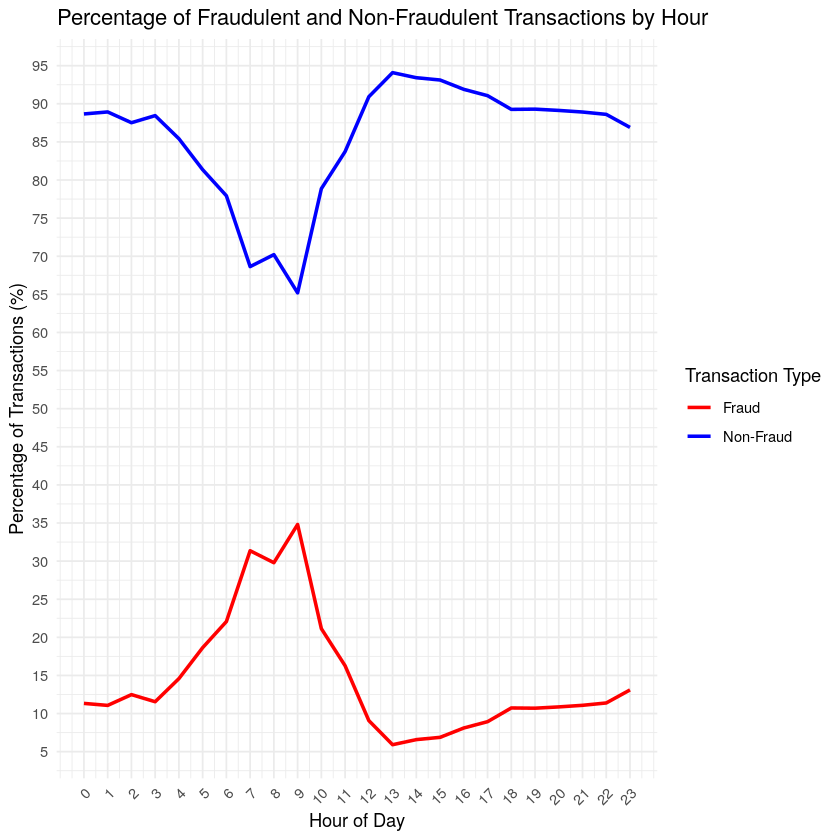

In [60]:
# view the percentage of isFraud and non-fraud by TransactionHour ------------------------------------------------
fraud_non_fraud_percentage_per_hour <- fraud_per_hour %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)

# visualize the percentage of isFraud and non-fraud by TransactionHour ------------------------------------------------
ggplot(fraud_non_fraud_percentage_per_hour, aes(x = TransactionHour)) +
  geom_line(aes(y = FraudPercentage, color = "Fraud"), size = 1) +
  geom_line(aes(y = NonFraudPercentage, color = "Non-Fraud"), size = 1) +
  labs(title = "Percentage of Fraudulent and Non-Fraudulent Transactions by Hour",
       x = "Hour of Day",
       y = "Percentage of Transactions (%)") +
  theme_minimal() +
  scale_x_continuous(breaks = 0:23) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_color_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue"), name = "Transaction Type")

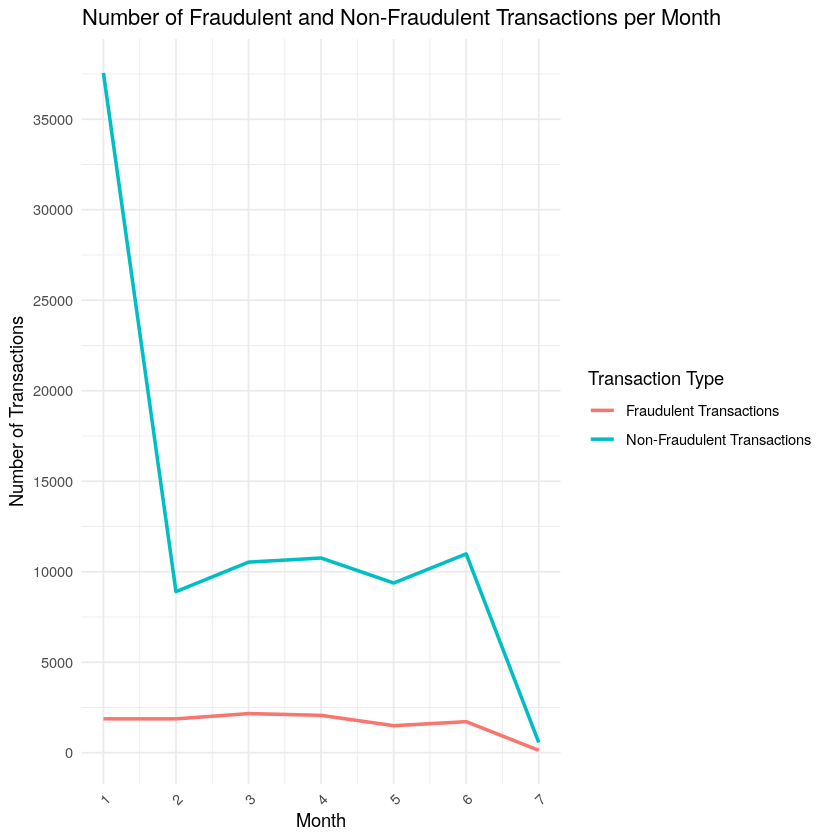

In [61]:
# count the number of transactions per month group by isFraud and Non-Fraud ----------------------------------------------
transactions_per_month <- data %>% group_by(TransactionMonth) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud))

# visualize the number of isFraud and non-fraud per month ----------------------------------------------
ggplot(transactions_per_month, aes(x = TransactionMonth)) +
  geom_line(aes(y = FraudCount, color = "Fraudulent Transactions"), size = 1) +
  geom_line(aes(y = NonFraudCount, color = "Non-Fraudulent Transactions"), size = 1) +
  labs(title = "Number of Fraudulent and Non-Fraudulent Transactions per Month",
       x = "Month",
       y = "Number of Transactions",
       color = "Transaction Type") +
  theme_minimal() +
  scale_x_continuous(breaks = 1:12) +
  scale_y_continuous(breaks = seq(0, max(transactions_per_month$NonFraudCount, na.rm = TRUE), by = 5000)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

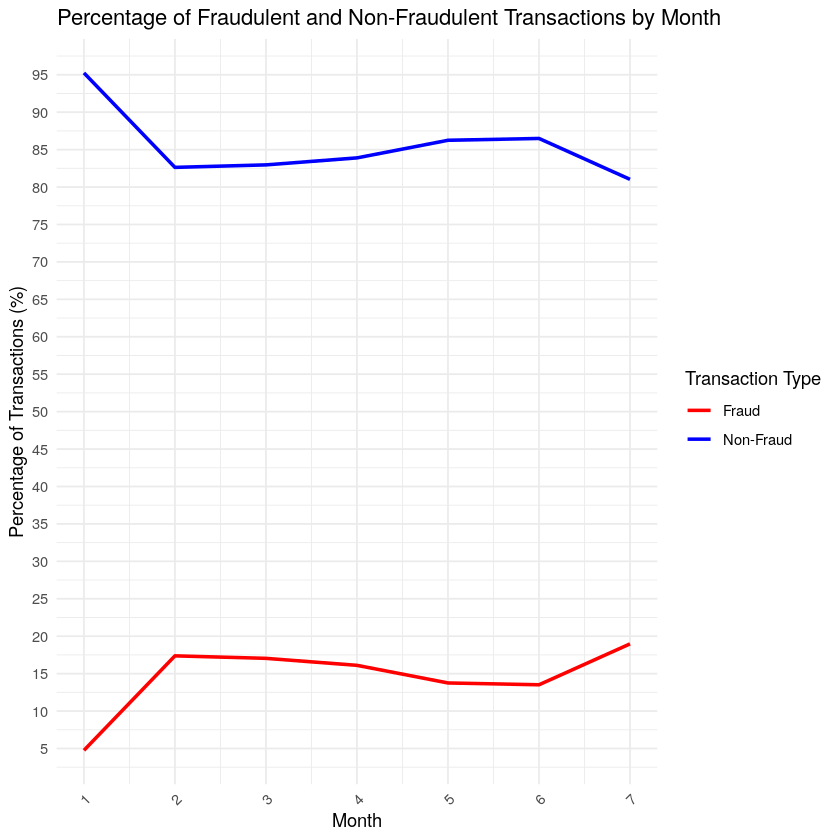

In [62]:
# view the percentage of transactions per month group by isFraud and Non-Fraud ------------------------------------------------
fraud_non_fraud_percentage_per_month <- transactions_per_month %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
# visualize the percentage of transactions per month group by isFraud and Non-Fraud ------------------------------------------------
ggplot(fraud_non_fraud_percentage_per_month, aes(x = TransactionMonth)) +
  geom_line(aes(y = FraudPercentage, color = "Fraud"), size = 1) +
  geom_line(aes(y = NonFraudPercentage, color = "Non-Fraud"), size = 1) +
  labs(title = "Percentage of Fraudulent and Non-Fraudulent Transactions by Month",
       x = "Month",
       y = "Percentage of Transactions (%)") +
  theme_minimal() +
  scale_x_continuous(breaks = 1:12) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_color_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue"), name = "Transaction Type")

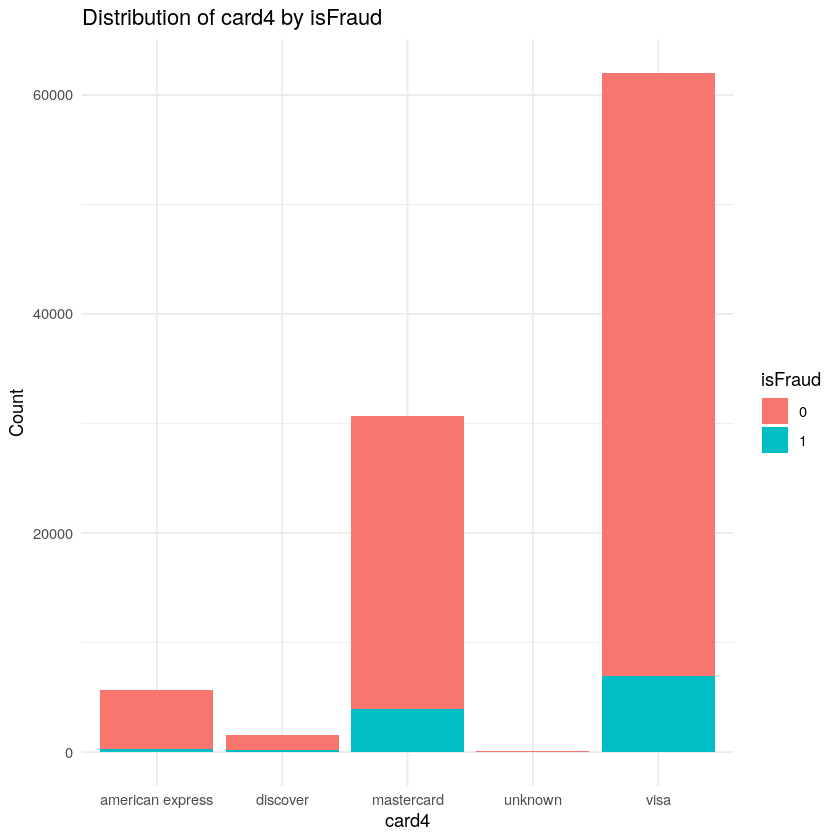

In [63]:
# view the distribution of card4 group by isFraud ------------------------------------------------
ggplot(data, aes(x = card4, fill = factor(isFraud))) +
  geom_bar() +
  labs(title = "Distribution of card4 by isFraud",
       x = "card4",
       y = "Count",
       fill = "isFraud") +
  theme_minimal()

In [64]:
# view the percentage of card4 group by isFraud ------------------------------------------------
card4_fraud_percentage <- data %>%
  group_by(card4) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(card4_fraud_percentage)


# A tibble: 5 × 5
  card4            FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>                 <int>         <int>           <dbl>              <dbl>
1 american express        239          5400            4.24               95.8
2 discover                177          1375           11.4                88.6
3 mastercard             3920         26760           12.8                87.2
4 unknown                  14           109           11.4                88.6
5 visa                   6968         55038           11.2                88.8


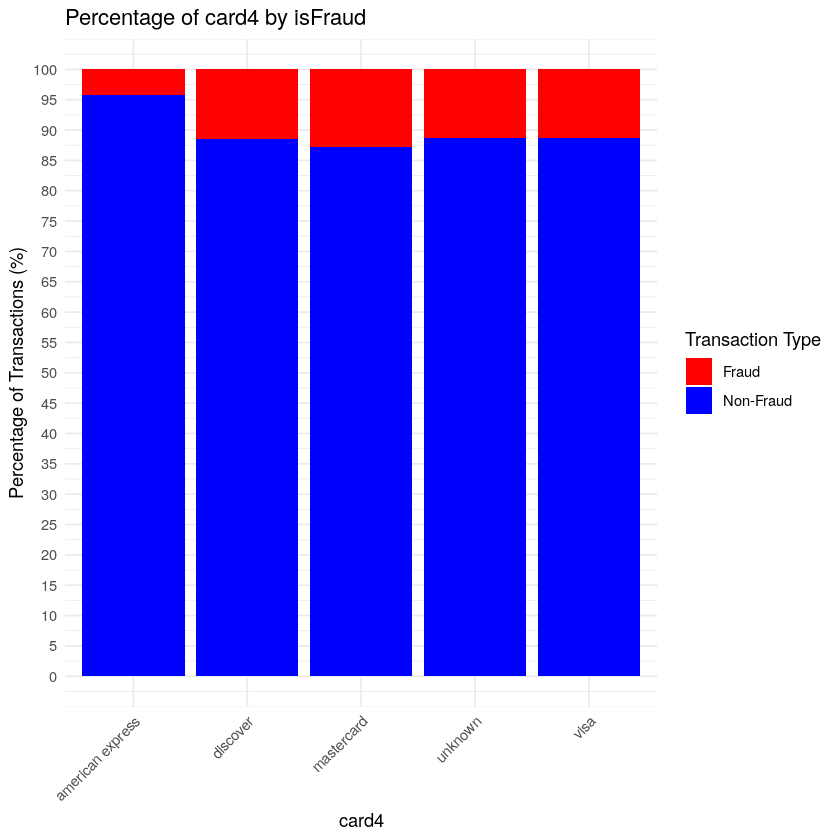

In [65]:
# visualize the percentage of card4 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
card4_plot_data <- card4_fraud_percentage %>%
  select(card4, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

# Create the plot with proper dodged bars
ggplot(card4_plot_data, aes(x = card4, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of card4 by isFraud",
       x = "card4",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


# A tibble: 4 × 5
  card6       FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 charge card          0             9            0                 100  
2 credit            6693         45585           12.8                87.2
3 debit             4613         42982            9.69               90.3
4 unknown             12           106           10.2                89.8


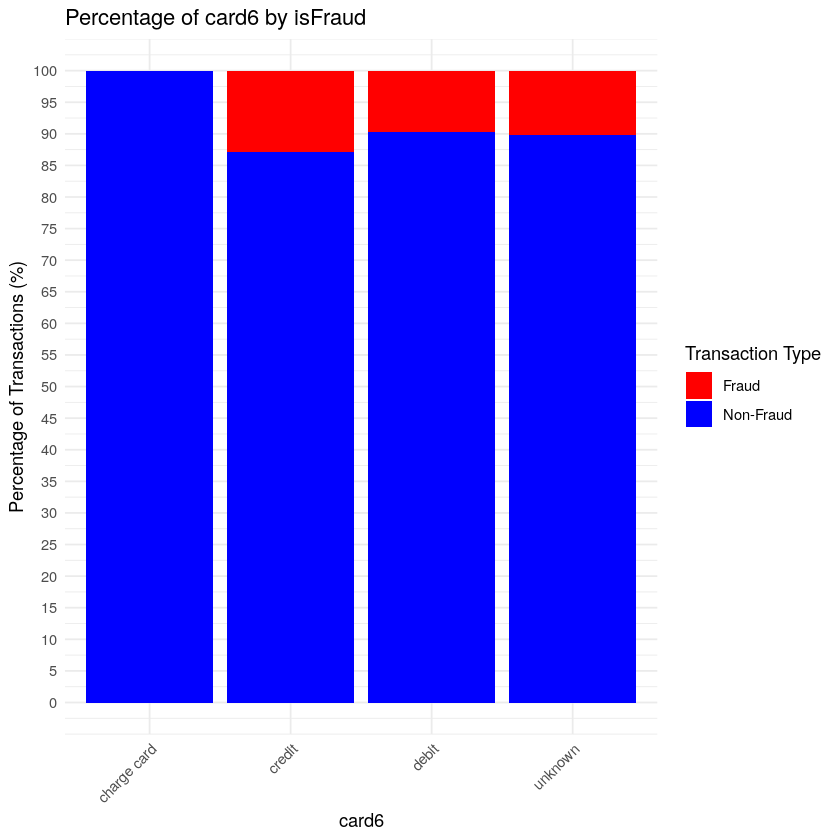

In [66]:
# view the percentage of card6 group by isFraud ------------------------------------------------
card6_fraud_percentage <- data %>%
  group_by(card6) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(card6_fraud_percentage)

# visualize the percentage of card6 group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
card6_plot_data <- card6_fraud_percentage %>%
  select(card6, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  )) 

  # Create the plot with proper dodged bars
ggplot(card6_plot_data, aes(x = card6, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of card6 by isFraud",
       x = "card6",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")

# A tibble: 3 × 5
  DevType FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>        <int>         <int>           <dbl>              <dbl>
1 desktop       5554         53178            9.46               90.5
2 mobile        5657         33296           14.5                85.5
3 unknown        107          2208            4.62               95.4


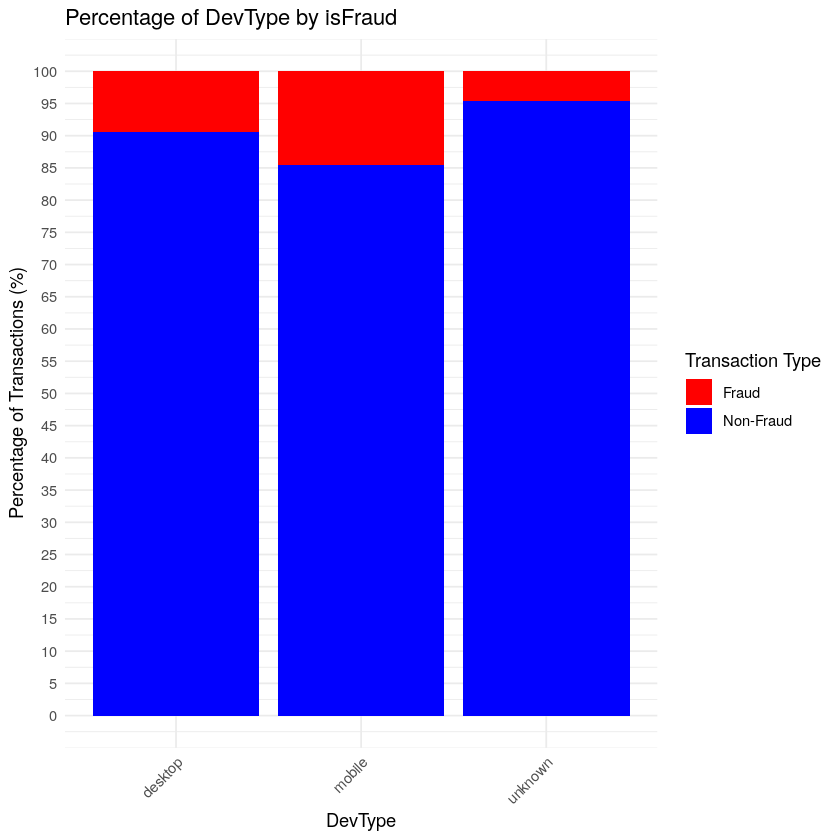

In [67]:
# view the percentage of DevType group by isFraud ------------------------------------------------
devtype_fraud_percentage <- data %>%
  group_by(DevType) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(devtype_fraud_percentage)

# visualize the percentage of DevType group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
devtype_plot_data <- devtype_fraud_percentage %>%
  select(DevType, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))

# Create the plot with proper dodged bars
ggplot(devtype_plot_data, aes(x = DevType, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of DevType by isFraud",
       x = "DevType",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")
       

# A tibble: 4 × 5
  ProductCD FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>          <int>         <int>           <dbl>              <dbl>
1 AD               684          7255            8.62               91.4
2 LY              7640         36492           17.3                82.7
3 TP              1571         20835            7.01               93.0
4 WF              1423         24100            5.58               94.4


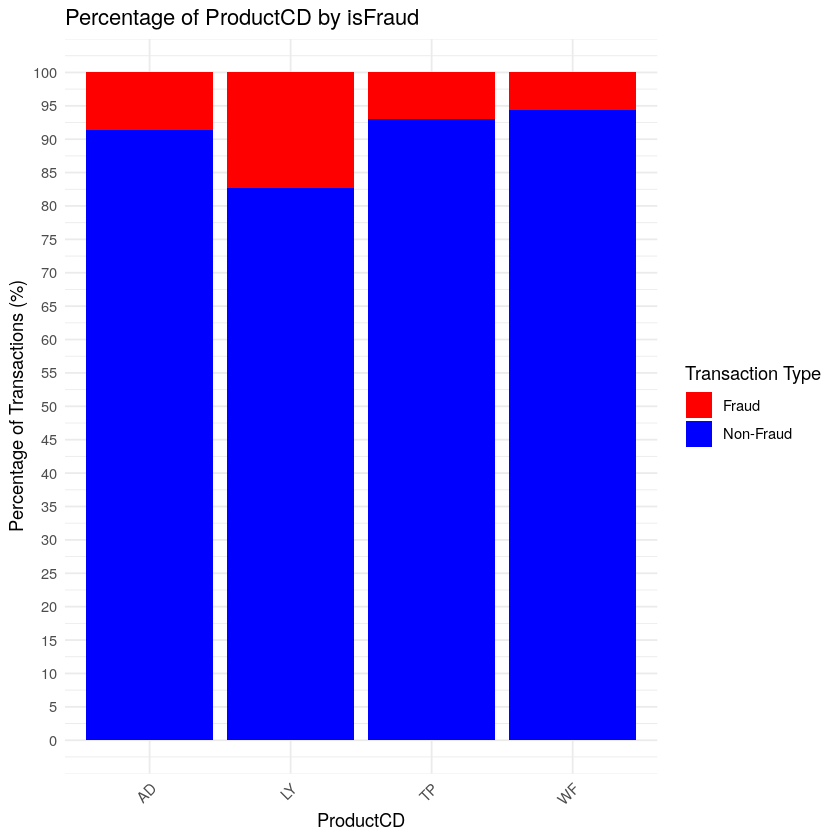

In [68]:
# view the percentage of ProductCD group by isFraud ------------------------------------------------
productcd_fraud_percentage <- data %>%
  group_by(ProductCD) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage =   (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(productcd_fraud_percentage)   

# visualize the percentage of ProductCD group by isFraud ------------------------------------------------
# First, reshape the data for better plotting
productcd_plot_data <- productcd_fraud_percentage %>%
  select(ProductCD, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(productcd_plot_data, aes(x = ProductCD, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of ProductCD by isFraud",
       x = "ProductCD",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")   

# A tibble: 2 × 5
  addr1_is_na FraudCount NonFraudCount FraudPercentage NonFraudPercentage
  <chr>            <int>         <int>           <dbl>              <dbl>
1 NA                7433         35448           17.3                82.7
2 Not NA            3885         53234            6.80               93.2


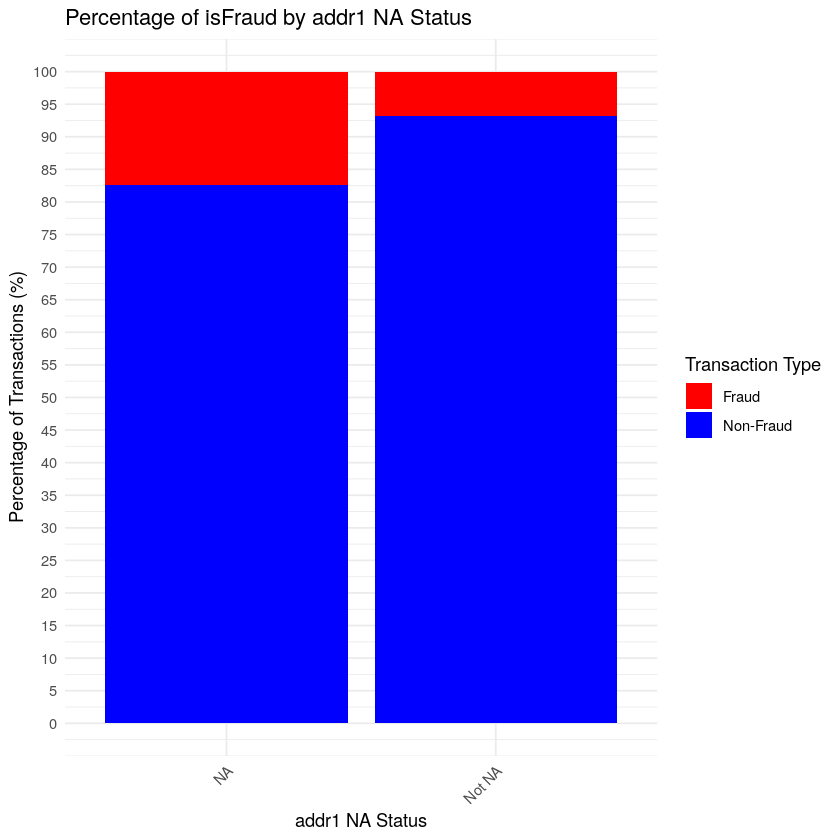

In [75]:
# view the percentage of isFraud by addr1 which is.na and not is.na ------------------------------------------------
addr1_fraud_summary <- data %>%
  mutate(addr1_is_na = ifelse(is.na(addr1), "NA", "Not NA")) %>%
  group_by(addr1_is_na) %>%
  summarise(FraudCount = sum(isFraud), NonFraudCount = n() - sum(isFraud)) %>%
  mutate(FraudPercentage = (FraudCount / (FraudCount + NonFraudCount)) * 100,
         NonFraudPercentage = (NonFraudCount / (FraudCount + NonFraudCount)) * 100)
print(addr1_fraud_summary)

# visualize the percentage of isFraud by addr1 which is.na and not is.na ------------------------------------------------
# First, reshape the data for better plotting
addr1_plot_data <- addr1_fraud_summary %>%
  select(addr1_is_na, FraudPercentage, NonFraudPercentage) %>%
  pivot_longer(cols = c(FraudPercentage, NonFraudPercentage), 
               names_to = "Type", 
               values_to = "Percentage") %>%
  mutate(Type = case_when(
    Type == "FraudPercentage" ~ "Fraud",
    Type == "NonFraudPercentage" ~ "Non-Fraud"
  ))
# Create the plot with proper dodged bars
ggplot(addr1_plot_data, aes(x = addr1_is_na, y = Percentage, fill = Type)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Fraud" = "red", "Non-Fraud" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(breaks = seq(0, 100, by = 5)) +
  labs(title = "Percentage of isFraud by addr1 NA Status",
       x = "addr1 NA Status",
       y = "Percentage of Transactions (%)",
       fill = "Transaction Type")


# FITE7410 Assignment 1 - Comprehensive Exploratory Data Analysis

## Table of Contents
1. **Data Overview & Structure**
2. **Data Quality Assessment**
3. **Univariate Analysis**
4. **Bivariate Analysis**
5. **Multivariate Analysis**
6. **Feature Engineering**
7. **Insights & Recommendations**

---

## 1. Data Overview & Structure

In [ ]:
# 1.1 Dataset Dimensions and Basic Information --------------------------------
cat("Dataset Dimensions:\n")
cat("Rows:", nrow(data), "\n")
cat("Columns:", ncol(data), "\n\n")

cat("Data Types:\n")
str(data)

cat("\nFirst few rows:\n")
print(head(data, 10))

Dataset Dimensions:
Rows: 100000 
Columns: 101 

Data Types:
Rows: 100000 
Columns: 101 

Data Types:
tibble [100,000 × 101] (S3: tbl_df/tbl/data.frame)
 $ TxnID        : int [1:100000] 2987004 2987011 2987016 2987022 2987038 2987040 2987048 2987057 2987069 2987070 ...
 $ isFraud      : int [1:100000] 0 0 0 0 0 0 0 0 0 0 ...
 $ TxnDT        : int [1:100000] 86506 86555 86620 86786 87172 87209 87317 87445 87725 87735 ...
 $ TxnDTHour    : int [1:100000] 24 24 24 24 24 24 24 24 24 24 ...
 $ TxnAmt       : num [1:100000] 82.9 27.3 49.7 82.9 41.4 ...
 $ ProductCD    : chr [1:100000] "TP" "LY" "TP" "TP" ...
 $ addr1        : int [1:100000] 402 NA 152 281 312 NA NA 186 312 307 ...
 $ addr2        : int [1:100000] 73 NA 73 73 73 NA NA 73 73 73 ...
 $ dist1        : logi [1:100000] NA NA NA NA NA NA ...
 $ dist2        : int [1:100000] NA 30 NA NA 98 NA NA NA 84 NA ...
 $ card1        : int [1:100000] 4497 4461 1790 1724 5463 13329 15885 11839 12866 3682 ...
 $ card2        : int [1:100000] 51

## 2. Data Quality Assessment

Missing Values Summary:


# A tibble: 101 × 3
   Variable Missing_Count Missing_Percentage
   <chr>            <int>              <dbl>
 1 dist1           100000                100
 2 D11             100000                100
 3 M1              100000                100
 4 M2              100000                100
 5 M3              100000                100
 6 M5              100000                100
 7 M6              100000                100
 8 M7              100000                100
 9 M8              100000                100
10 M9              100000                100
# ℹ 91 more rows


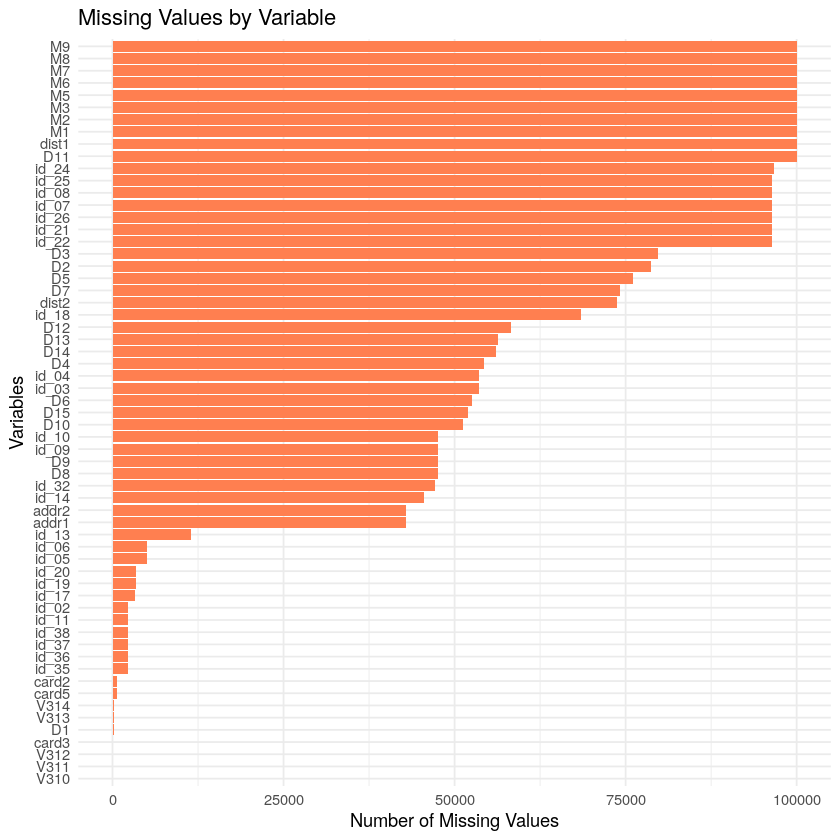

In [ ]:
# 2.1 Missing Values Analysis -----------------------------------------------
cat("Missing Values Summary:\n")
missing_summary <- data %>%
  summarise_all(~sum(is.na(.))) %>%
  gather(key = "Variable", value = "Missing_Count") %>%
  mutate(Missing_Percentage = round((Missing_Count / nrow(data)) * 100, 2)) %>%
  arrange(desc(Missing_Count))

print(missing_summary)

# Visualize missing values
if(any(missing_summary$Missing_Count > 0)) {
  missing_plot <- missing_summary %>%
    filter(Missing_Count > 0) %>%
    ggplot(aes(x = reorder(Variable, Missing_Count), y = Missing_Count)) +
    geom_bar(stat = "identity", fill = "coral") +
    coord_flip() +
    labs(title = "Missing Values by Variable", 
         x = "Variables", y = "Number of Missing Values") +
    theme_minimal()
  print(missing_plot)
} else {
  cat("✓ No missing values found in the dataset!\n")
}

In [ ]:
# 2.2 Duplicate Records Check -----------------------------------------------
cat("Duplicate Records Analysis:\n")
duplicates <- sum(duplicated(data))
cat("Number of duplicate rows:", duplicates, "\n")
cat("Percentage of duplicates:", round((duplicates / nrow(data)) * 100, 2), "%\n\n")

if(duplicates > 0) {
  cat("Duplicate rows found - consider investigating:\n")
  duplicate_rows <- data[duplicated(data), ]
  print(head(duplicate_rows))
}

Duplicate Records Analysis:
Number of duplicate rows: 0 
Percentage of duplicates: 0 %

Number of duplicate rows: 0 
Percentage of duplicates: 0 %



## 3. Univariate Analysis

In [ ]:
# 3.1 Identify Variable Types -----------------------------------------------
# Separate numeric and categorical variables
numeric_vars <- data %>% select_if(is.numeric) %>% names()
categorical_vars <- data %>% select_if(~!is.numeric(.)) %>% names()

cat("Numeric Variables (", length(numeric_vars), "):\n")
cat(paste(numeric_vars, collapse = ", "), "\n\n")

cat("Categorical Variables (", length(categorical_vars), "):\n")
cat(paste(categorical_vars, collapse = ", "), "\n\n")

# Summary statistics for numeric variables
if(length(numeric_vars) > 0) {
  cat("Summary Statistics for Numeric Variables:\n")
  summary_stats <- data %>% 
    select(all_of(numeric_vars)) %>%
    summary()
  print(summary_stats)
}

Numeric Variables ( 68 ):
TxnID, isFraud, TxnDT, TxnDTHour, TxnAmt, addr1, addr2, dist2, card1, card2, card3, card5, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D12, D13, D14, D15, V310, V311, V312, V313, V314, id_01, id_02, id_03, id_04, id_05, id_06, id_07, id_08, id_09, id_10, id_11, id_13, id_14, id_17, id_18, id_19, id_20, id_21, id_22, id_24, id_25, id_26, id_32 

Categorical Variables ( 33 ):
ProductCD, dist1, card4, card6, P_emaildomain, R_emaildomain, D11, M1, M2, M3, M4, M5, M6, M7, M8, M9, id_12, id_15, id_16, id_23, id_27, id_28, id_29, id_30, id_31, id_33, id_34, id_35, id_36, id_37, id_38, DevType, DevInfo 

Summary Statistics for Numeric Variables:
     TxnID            isFraud           TxnDT            TxnDTHour   
 Min.   :2987004   Min.   :0.0000   Min.   :   86506   Min.   :  24  
 1st Qu.:3078716   1st Qu.:0.0000   1st Qu.: 1900286   1st Qu.: 527  
 Median :3203512   Median :0.0000   Median : 5031202   Media

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


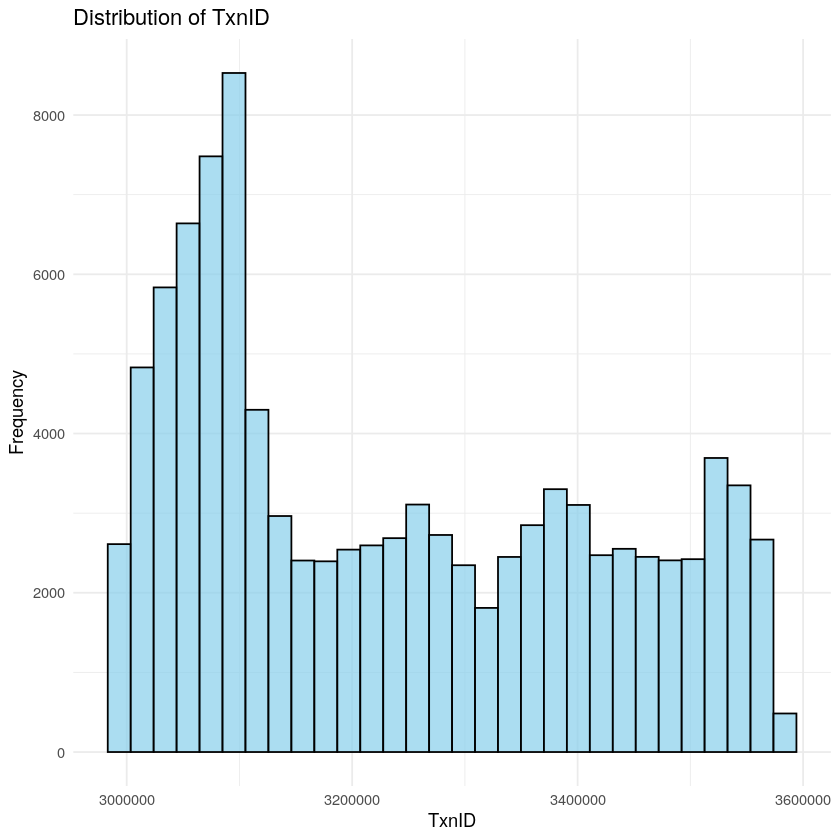

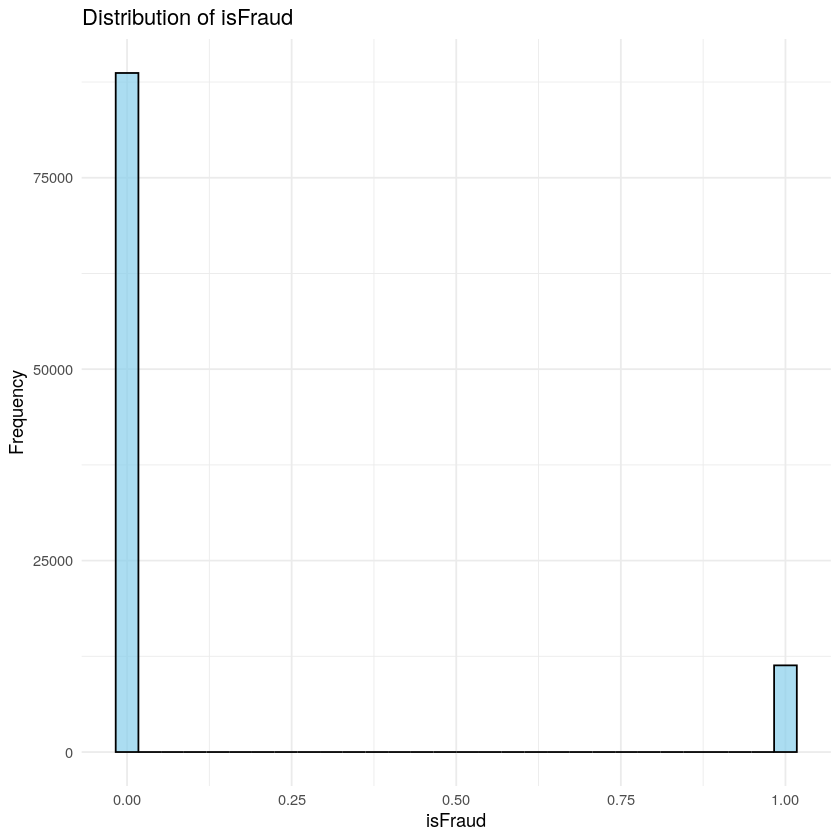

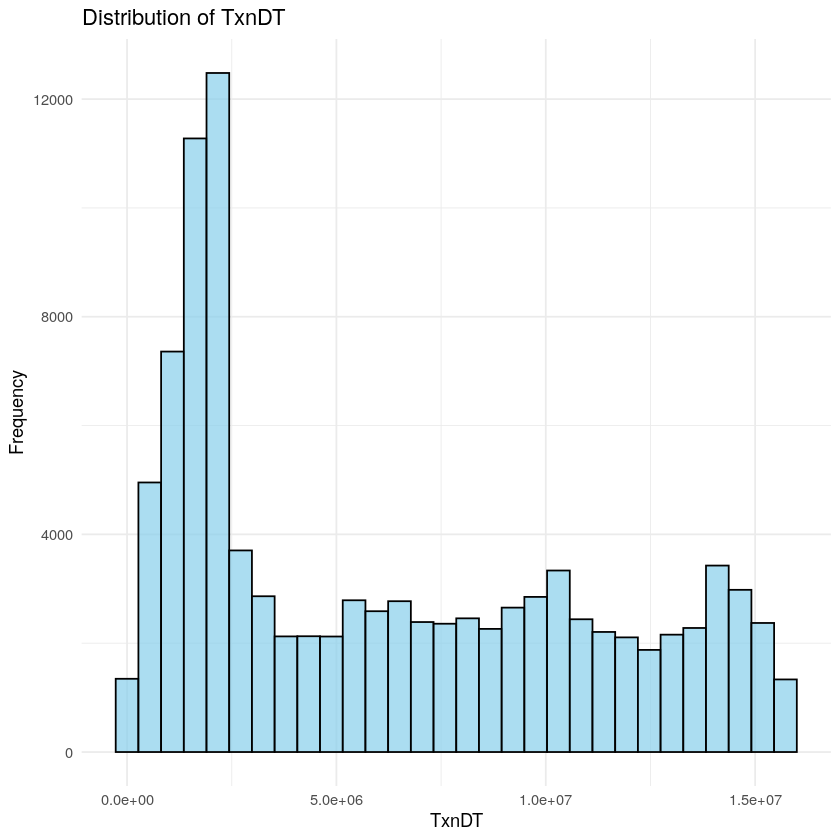

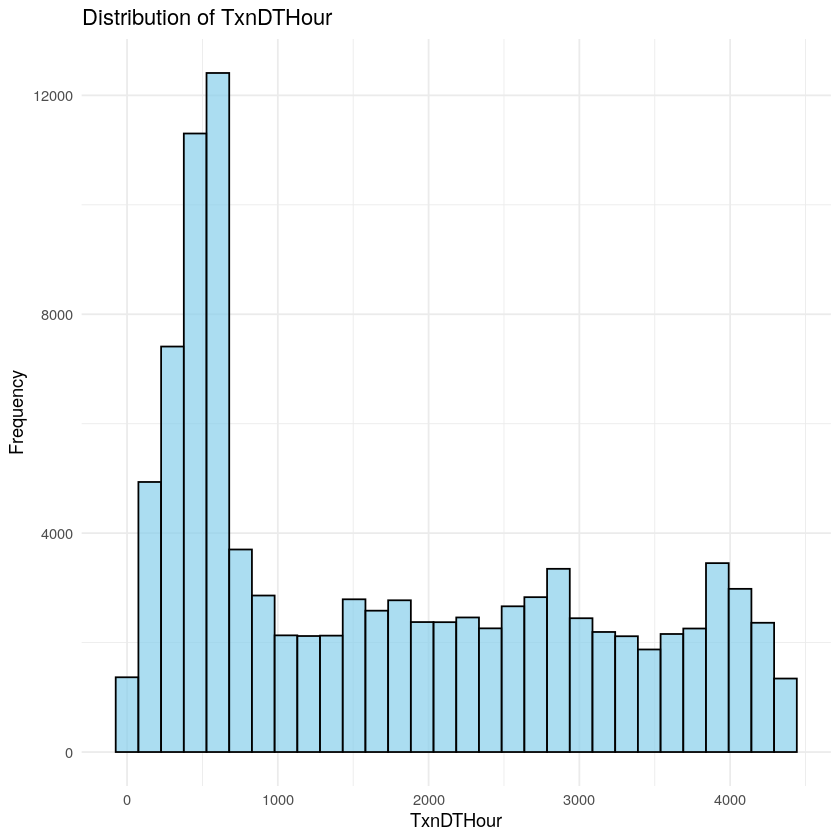

Warning message:
“Removed 42881 rows containing non-finite outside the scale range
(`stat_bin()`).”


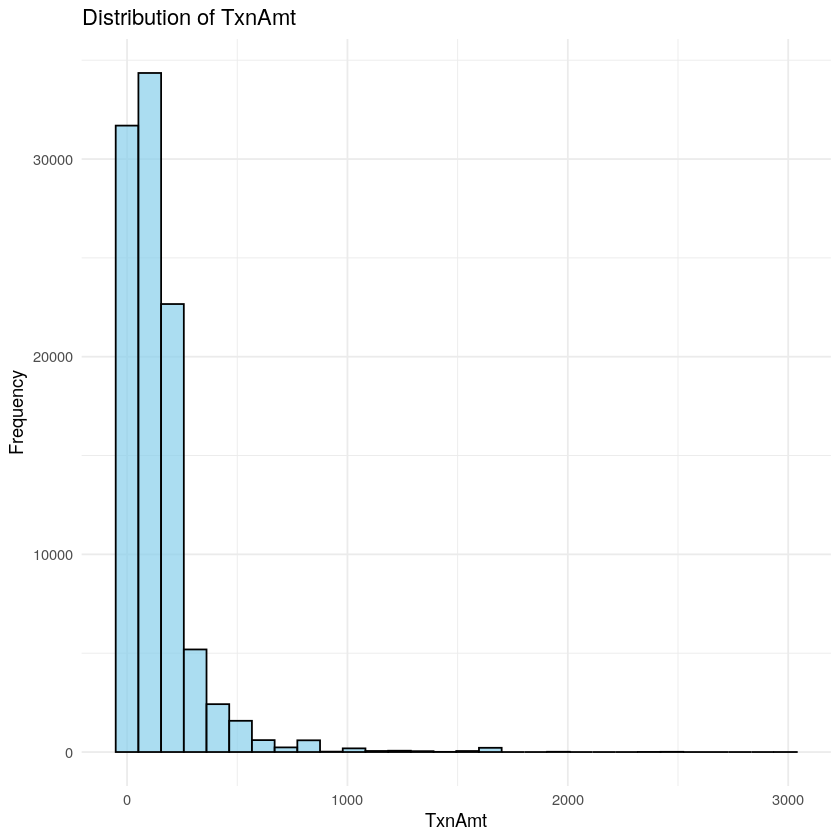

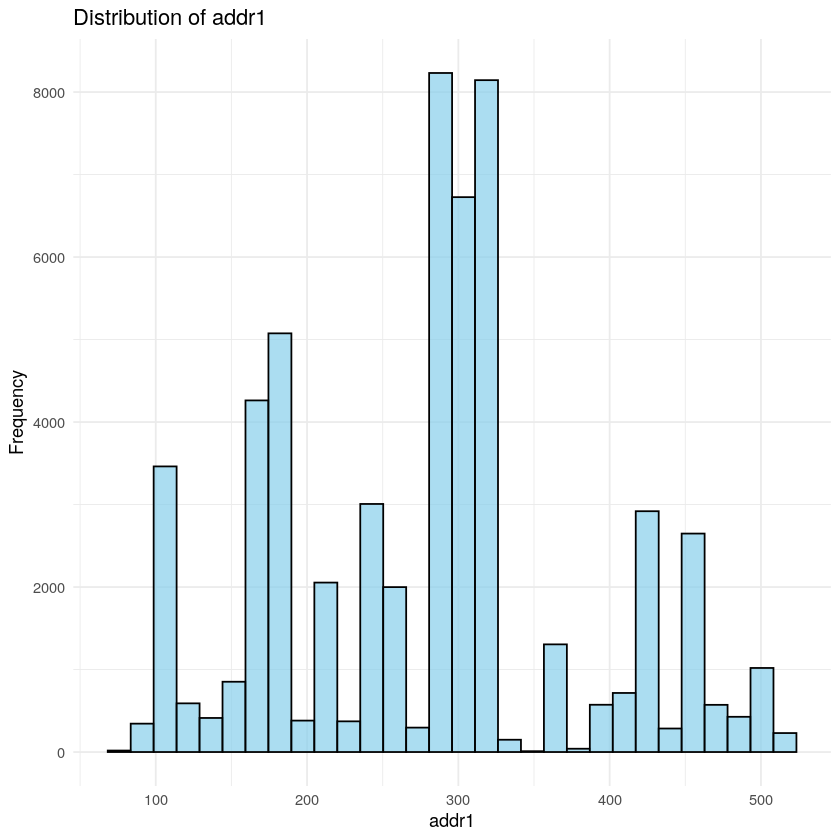

In [ ]:
# 3.2 Distributions of Numeric Variables ------------------------------------
if(length(numeric_vars) > 0) {
  # Create histograms for numeric variables
  plot_list <- list()
  
  for(var in numeric_vars[1:min(6, length(numeric_vars))]) {  # Limit to first 6 variables
    p <- ggplot(data, aes_string(x = var)) +
      geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
      labs(title = paste("Distribution of", var), x = var, y = "Frequency") +
      theme_minimal()
    plot_list[[var]] <- p
  }
  
  # Print plots
  if(length(plot_list) > 0) {
    for(i in 1:length(plot_list)) {
      print(plot_list[[i]])
    }
  }
}

Categorical Variables Summary:

 ProductCD :
Unique values: 4 

   AD    LY    TP    WF 
 7939 44132 22406 25523 

 dist1 :
Unique values: 1 
< table of extent 0 >


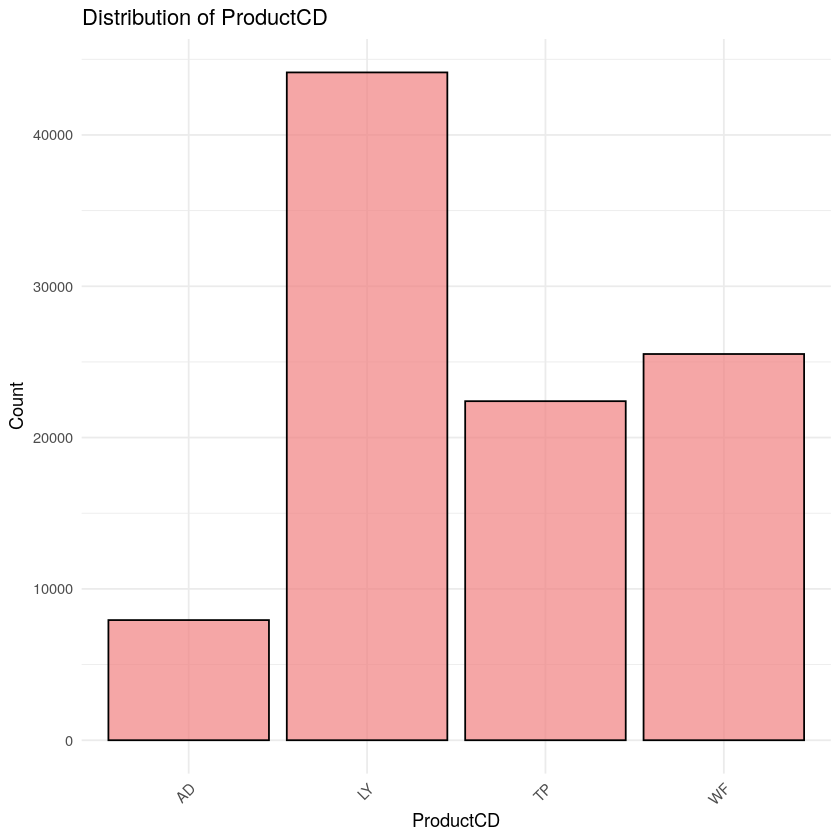


 card4 :
Unique values: 5 

                 american express         discover       mastercard 
             123             5639             1552            30680 
            visa 
           62006 


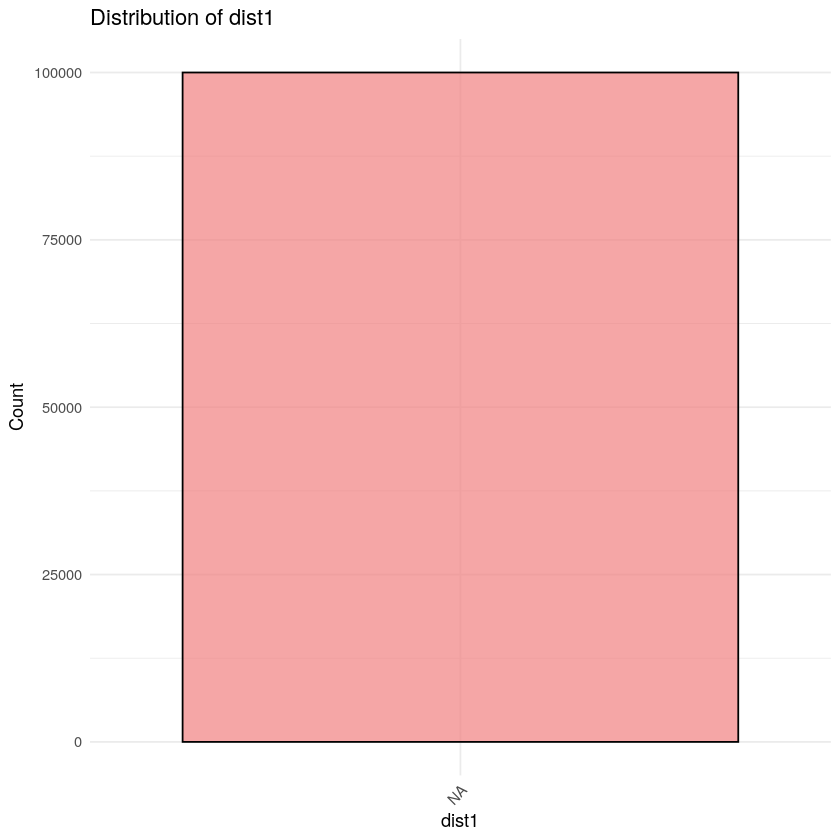


 card6 :
Unique values: 4 

            charge card      credit       debit 
        118           9       52278       47595 


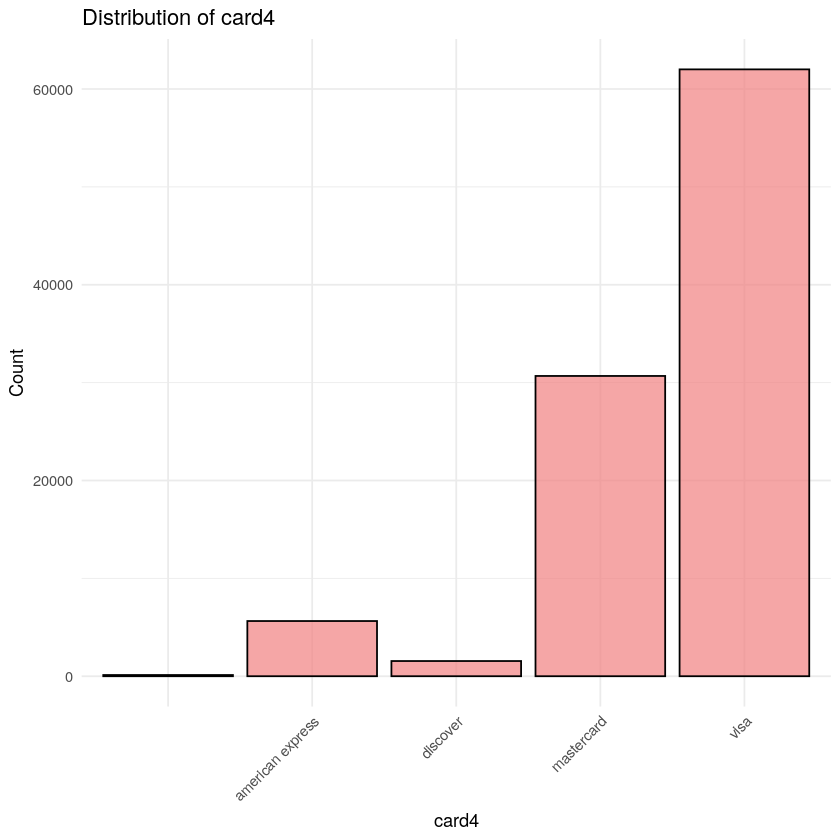


 P_emaildomain :
Unique values: 10 

                    AOL       Apple        AT&T CenturyLink      Google 
       9258        2898        1349         981          81       38294 
  Microsoft      Others    Spectrum       Yahoo 
      21983       15226         197        9733 


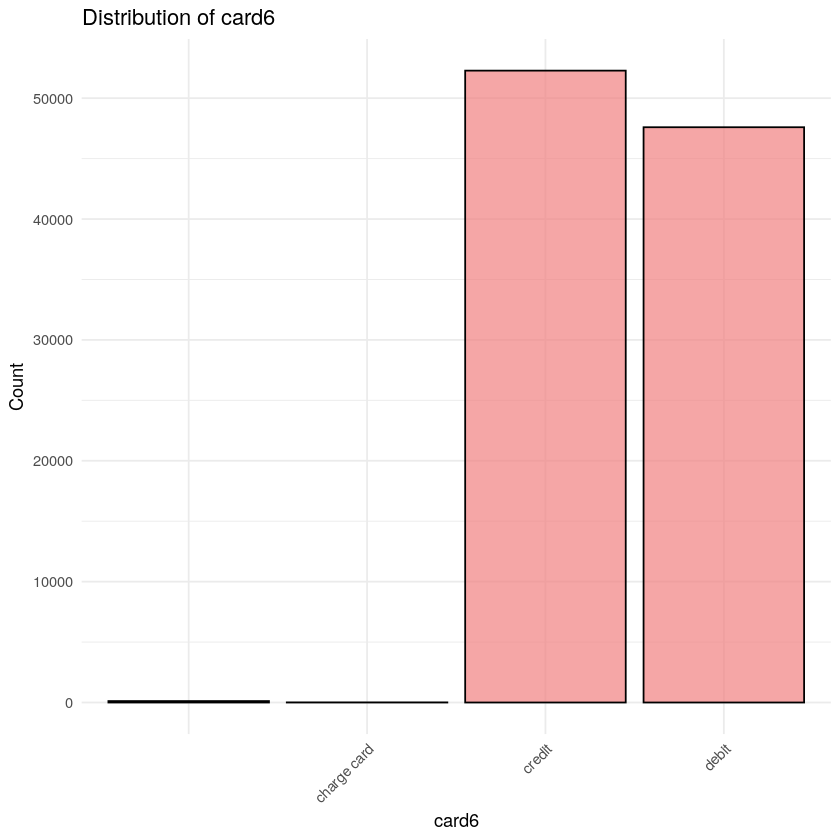


 R_emaildomain :
Unique values: 10 

                    AOL       Apple        AT&T CenturyLink      Google 
       8850        2536        1478         758          69       39044 
  Microsoft      Others    Spectrum       Yahoo 
      21420       16128         113        9604 


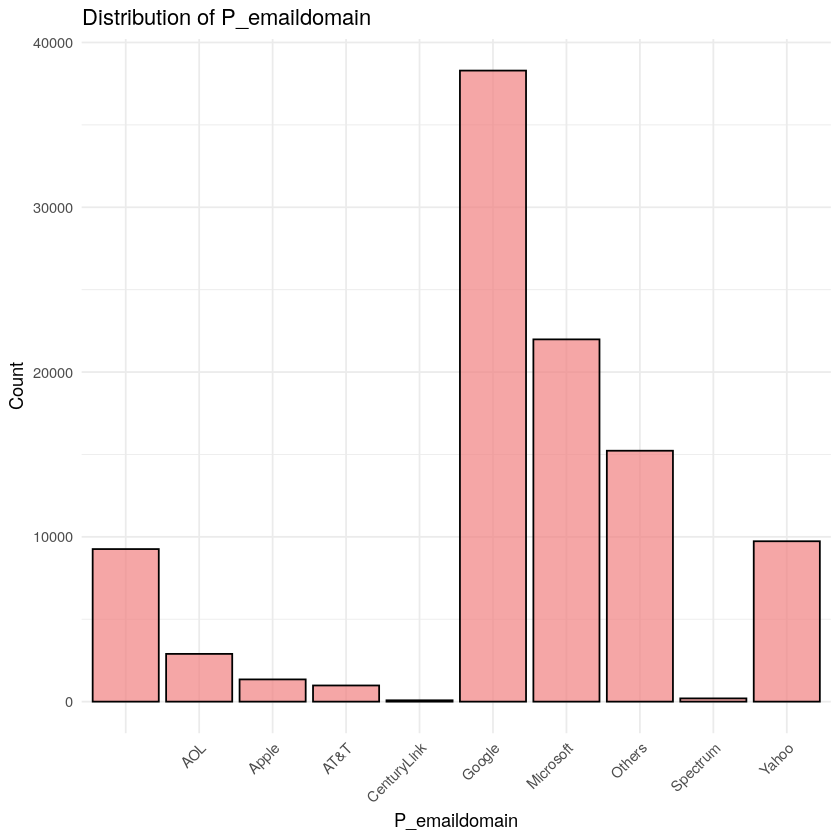


 D11 :
Unique values: 1 
< table of extent 0 >


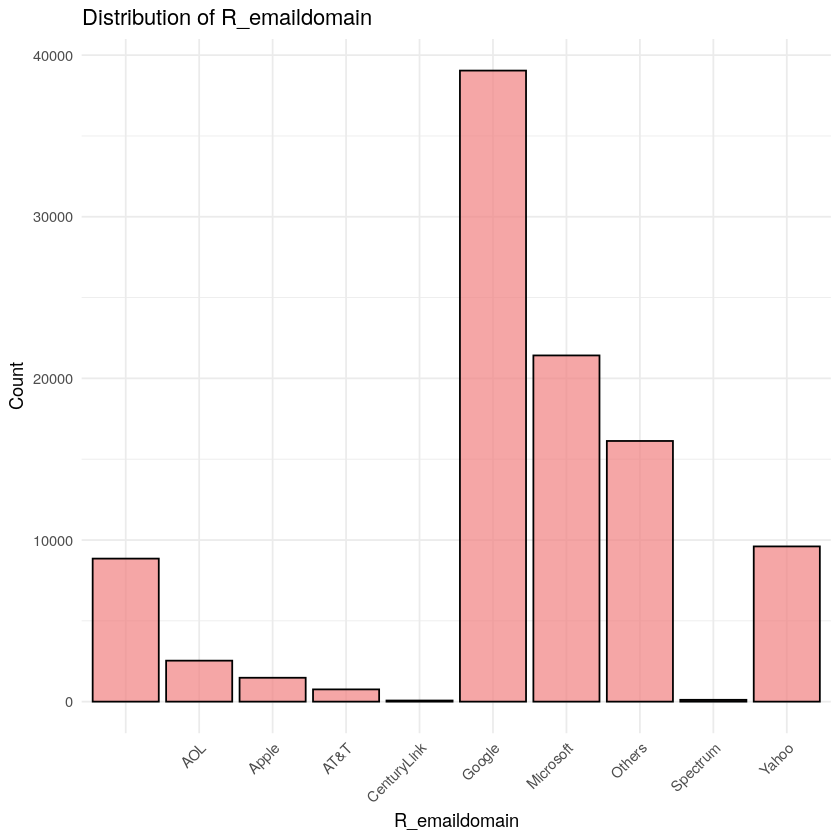


 M1 :
Unique values: 1 
< table of extent 0 >


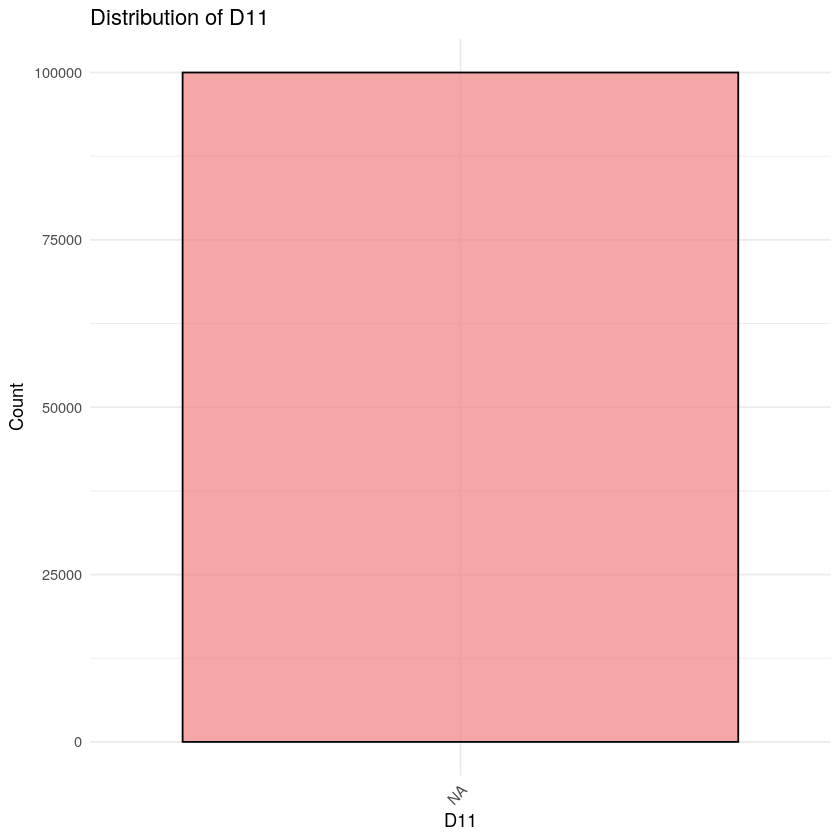


 M2 :
Unique values: 1 
< table of extent 0 >


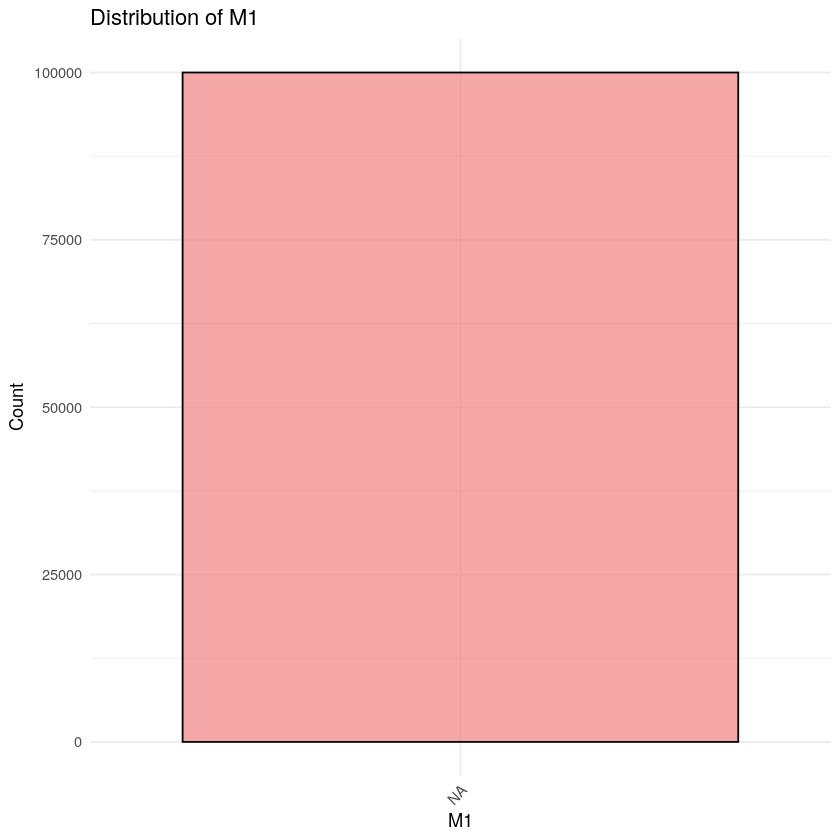


 M3 :
Unique values: 1 
< table of extent 0 >


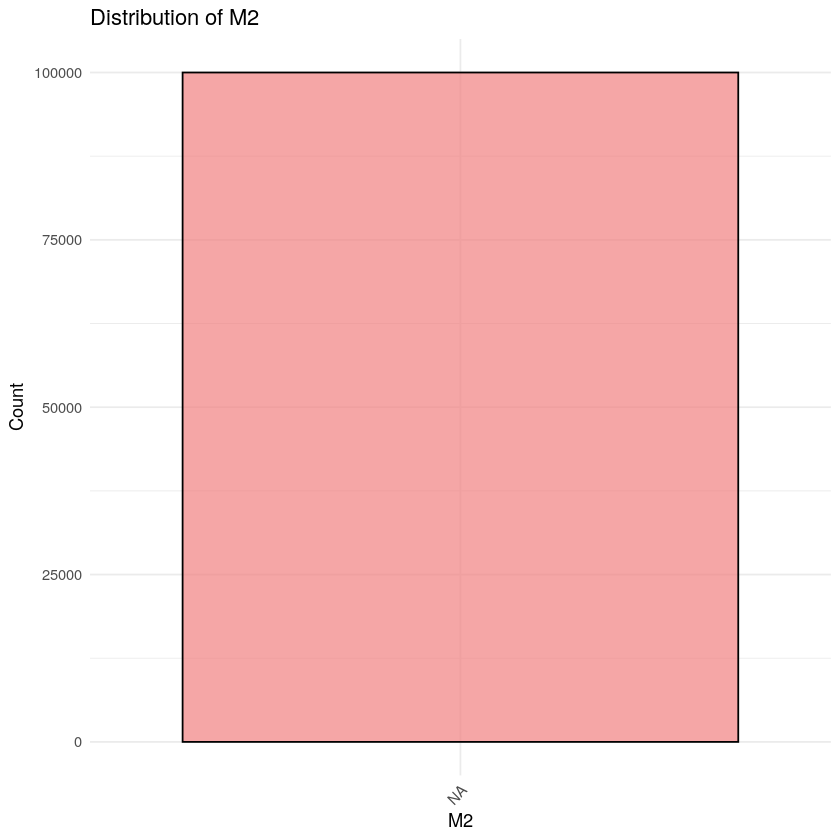


 M4 :
Unique values: 4 

         M0    M1    M2 
56831  7154   306 35709 


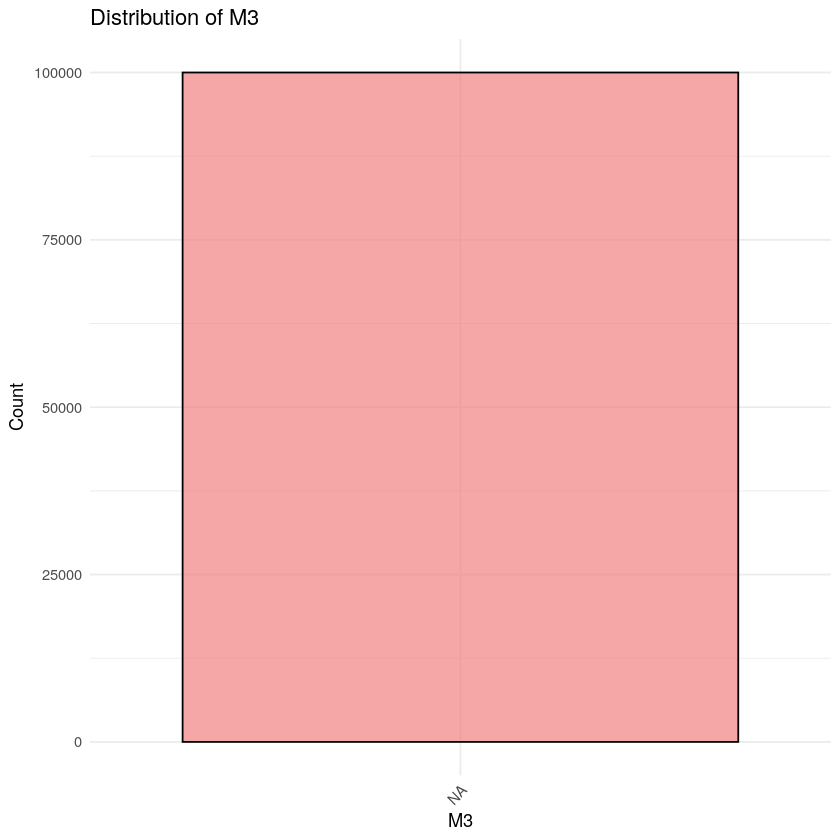


 M5 :
Unique values: 1 
< table of extent 0 >


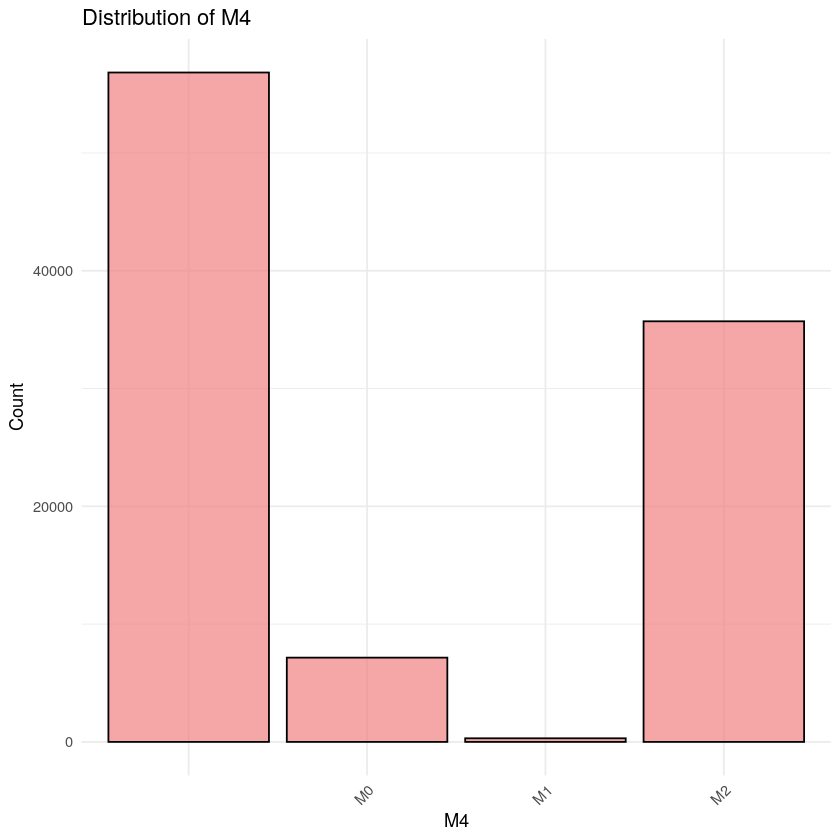


 M6 :
Unique values: 1 
< table of extent 0 >


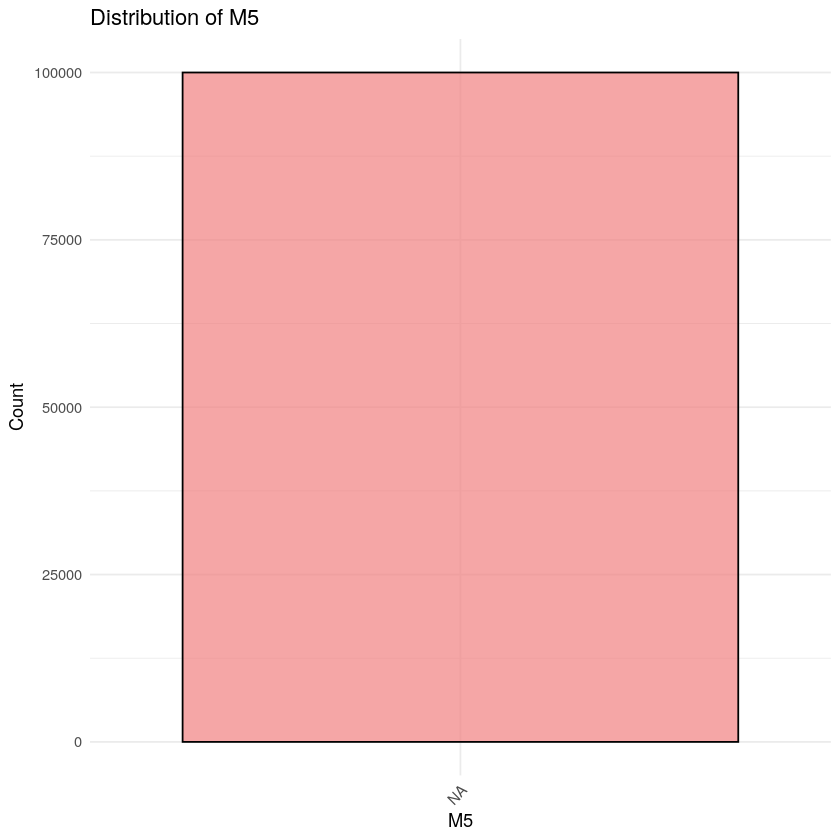


 M7 :
Unique values: 1 
< table of extent 0 >


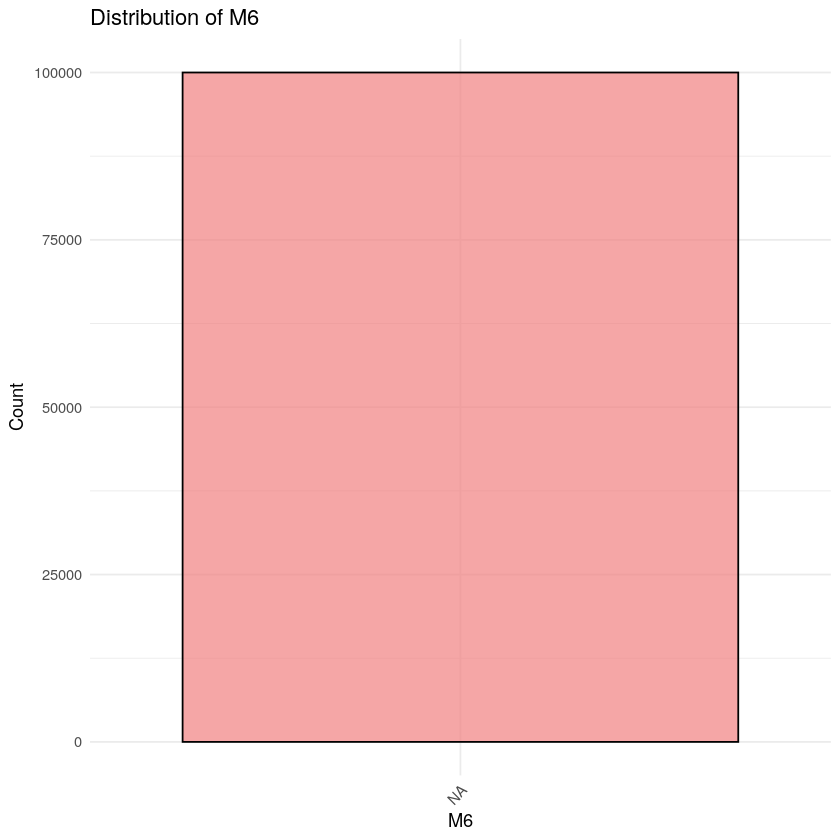


 M8 :
Unique values: 1 
< table of extent 0 >


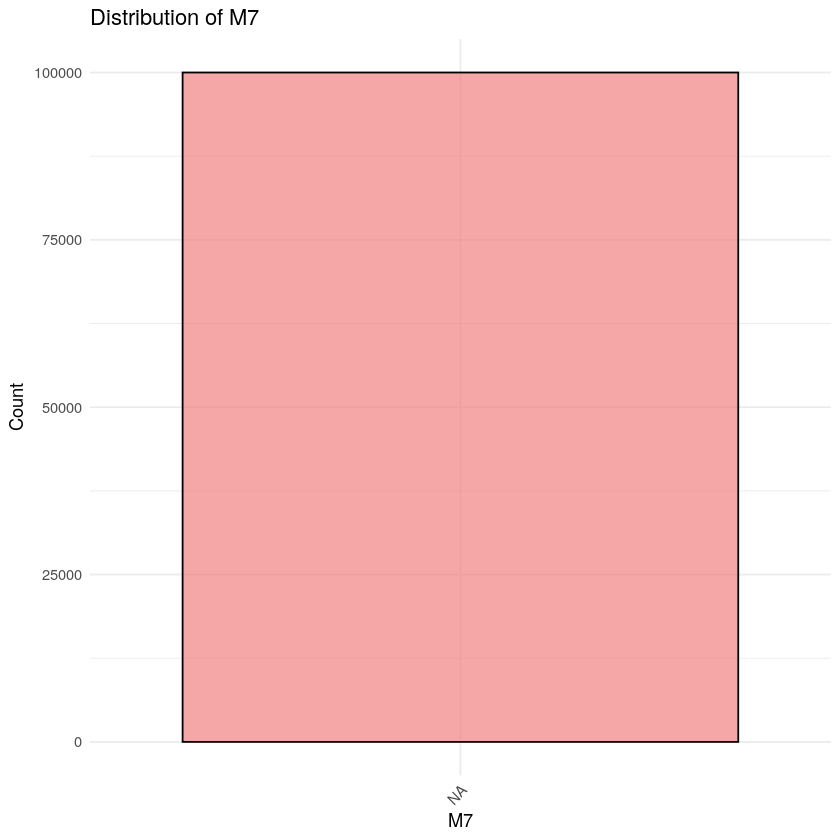


 M9 :
Unique values: 1 
< table of extent 0 >


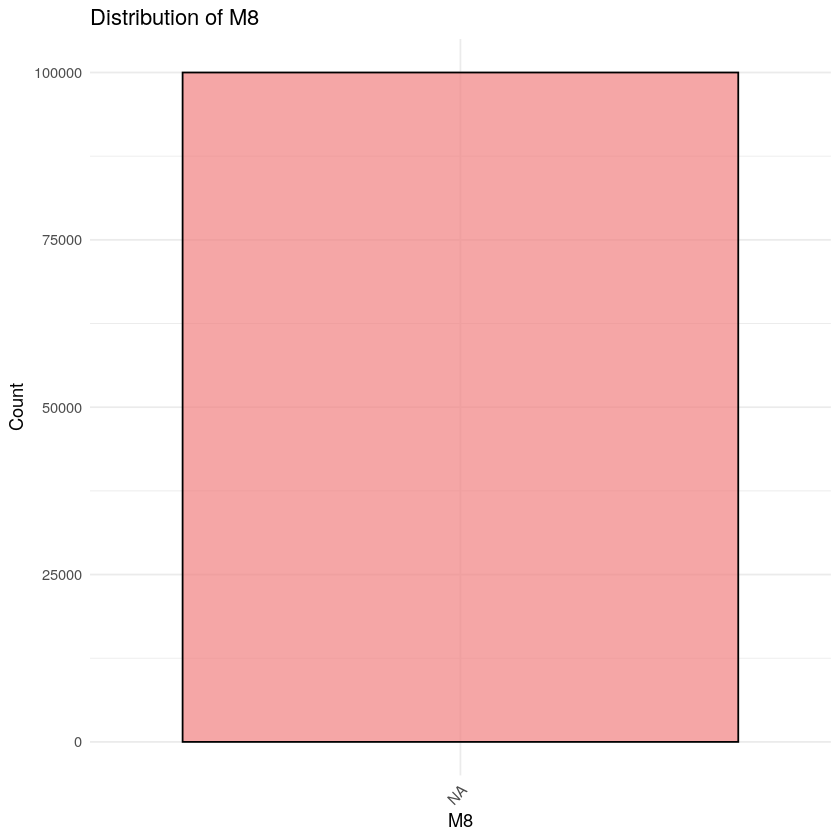


 id_12 :
Unique values: 2 

   Found NotFound 
   14445    85555 


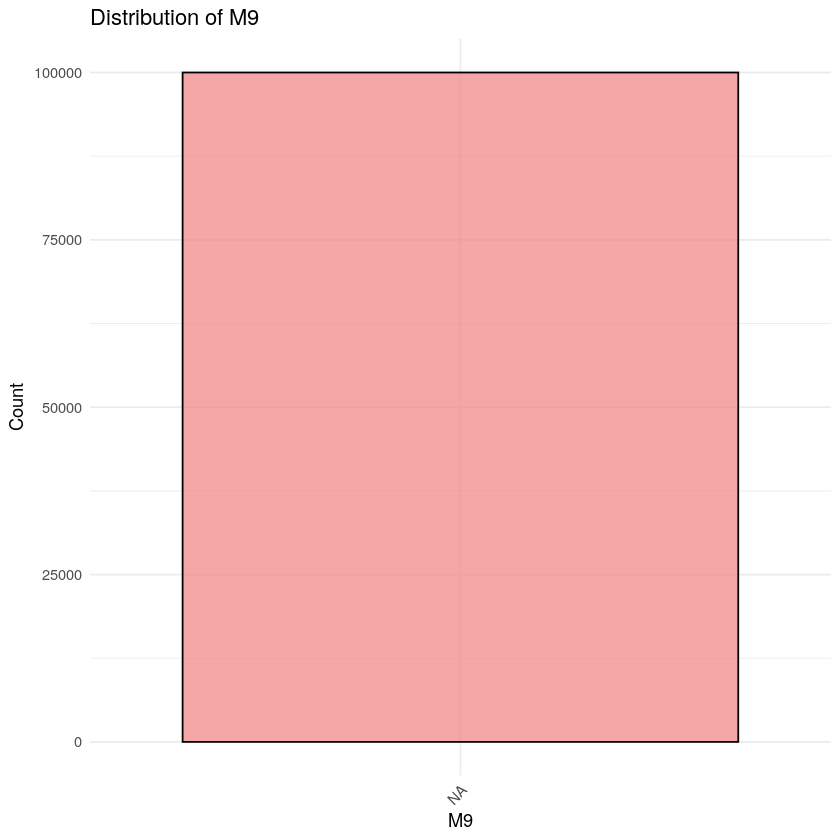


 id_15 :
Unique values: 4 

          Found     New Unknown 
   2196   47367   42287    8150 


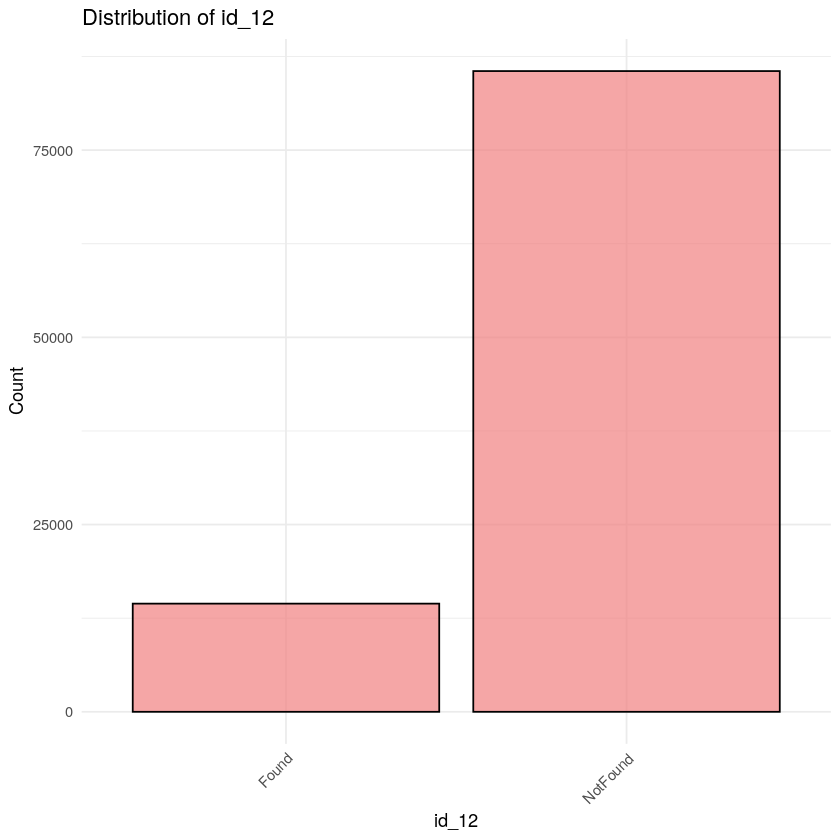


 id_16 :
Unique values: 3 

            Found NotFound 
   10346    46434    43220 


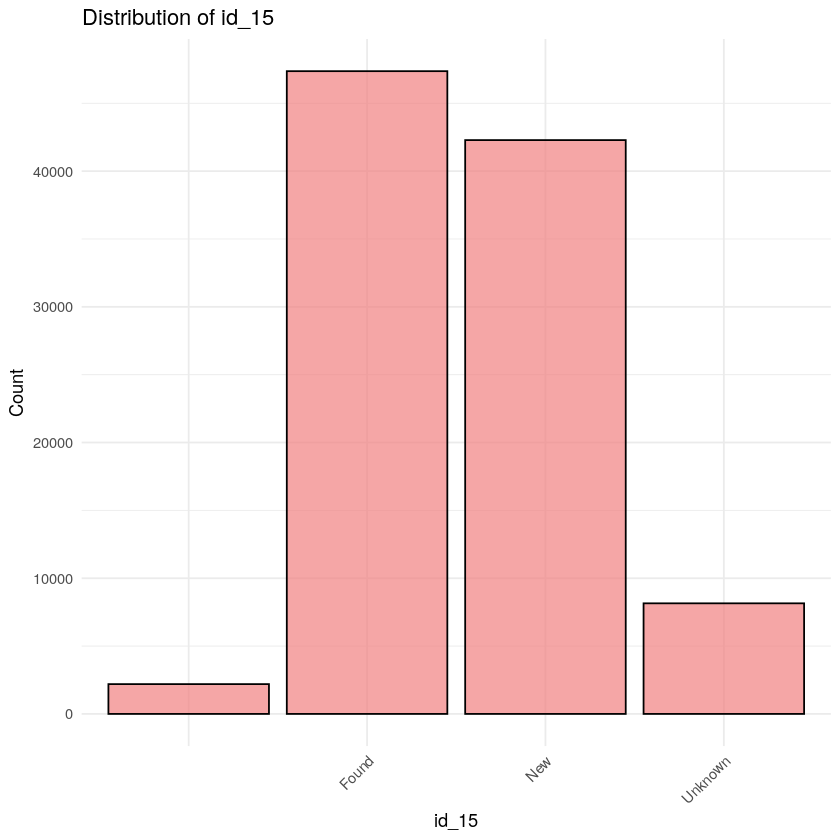


 id_23 :
Unique values: 4 

                       IP_PROXY:ANONYMOUS      IP_PROXY:HIDDEN 
               96405                  766                  422 
IP_PROXY:TRANSPARENT 
                2407 


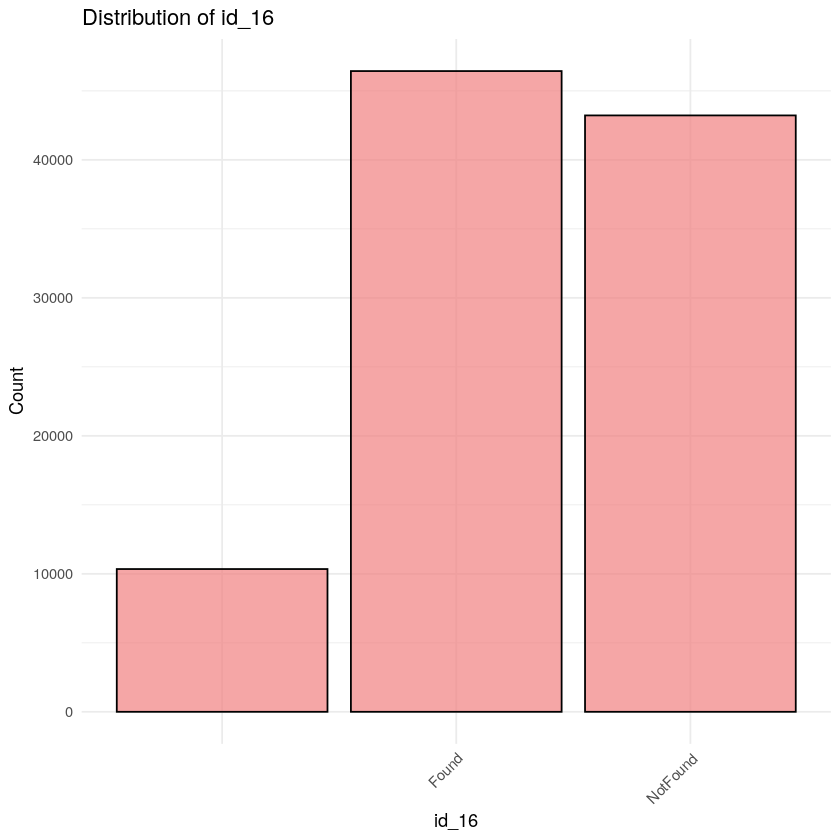


 id_27 :
Unique values: 3 

            Found NotFound 
   96405     3586        9 


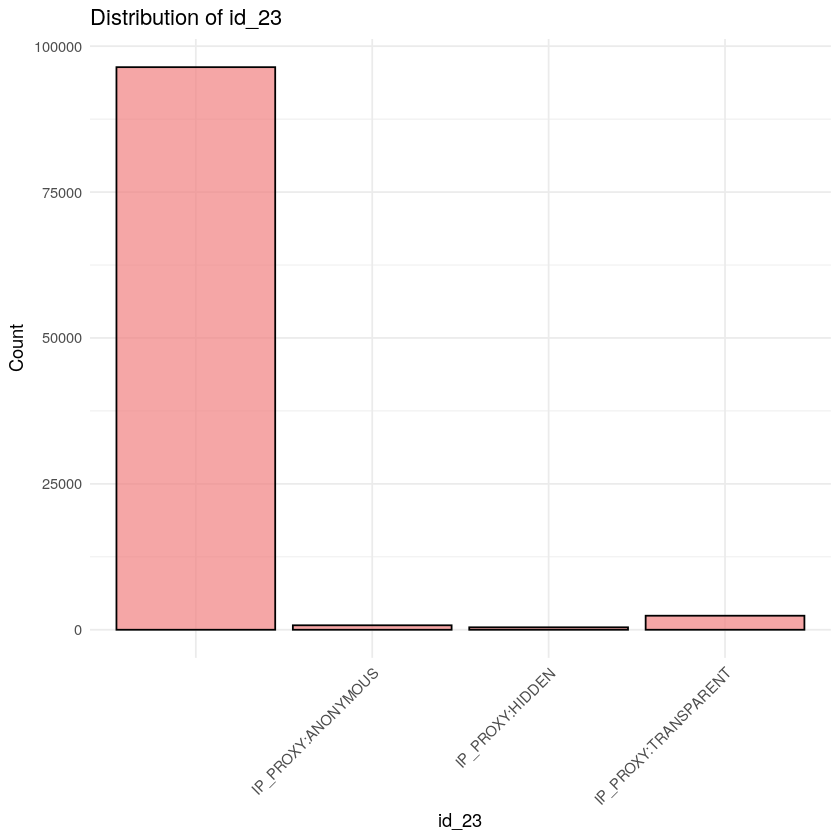


 id_28 :
Unique values: 3 

      Found   New 
 2203 53262 44535 


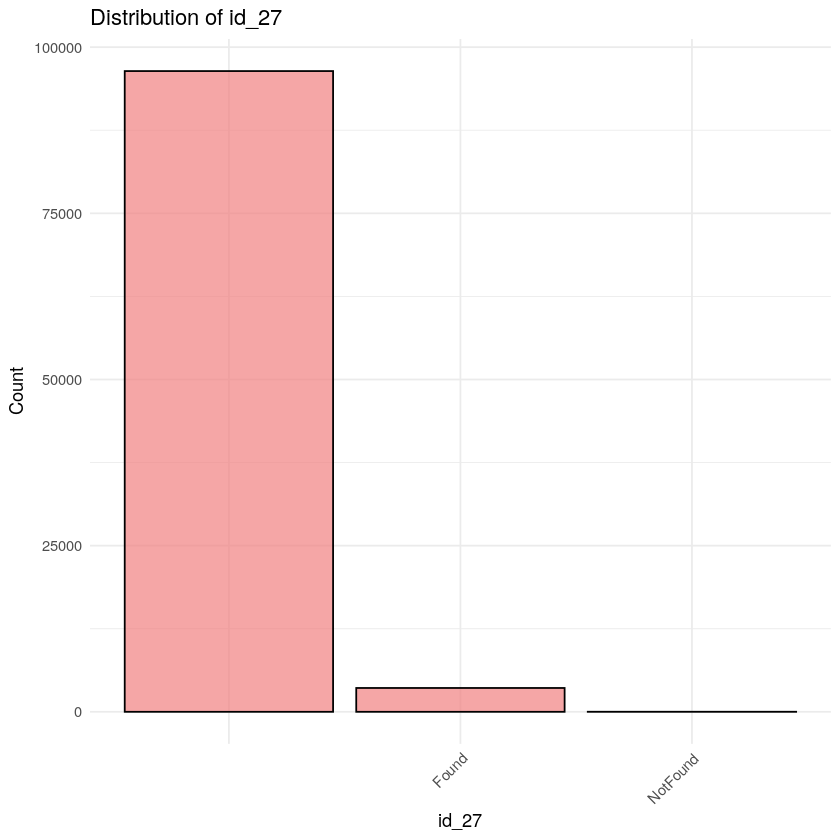


 id_29 :
Unique values: 3 

            Found NotFound 
    2203    52394    45403 


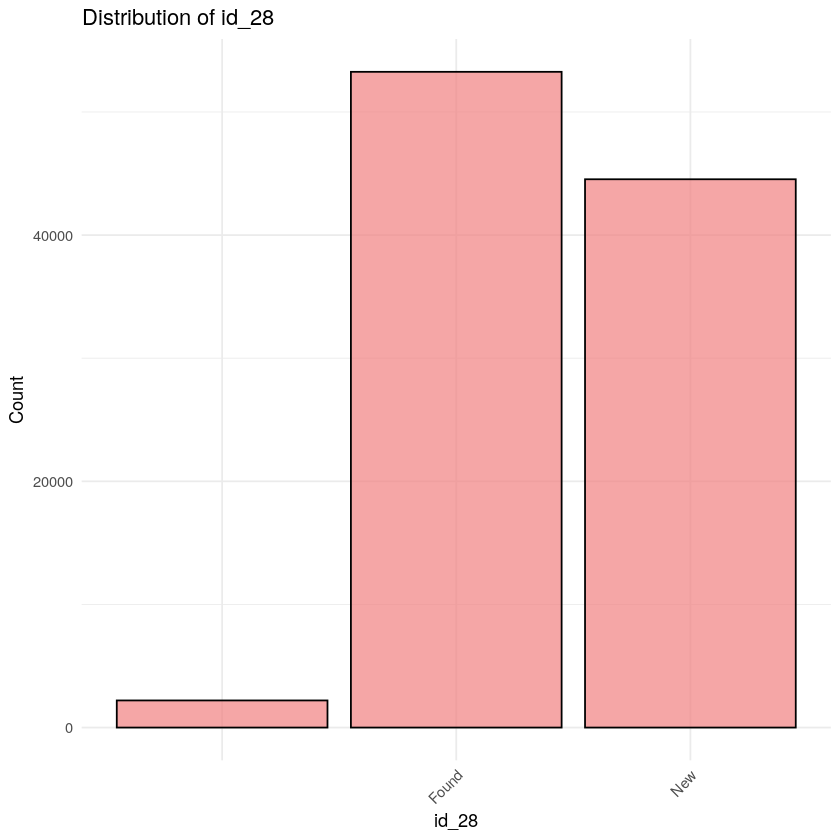


 id_30 :
Unique values: 8 

        Android    func     iOS   Linux     Mac   other Windows 
  47194    4370       8   13500     760    9114      11   25043 


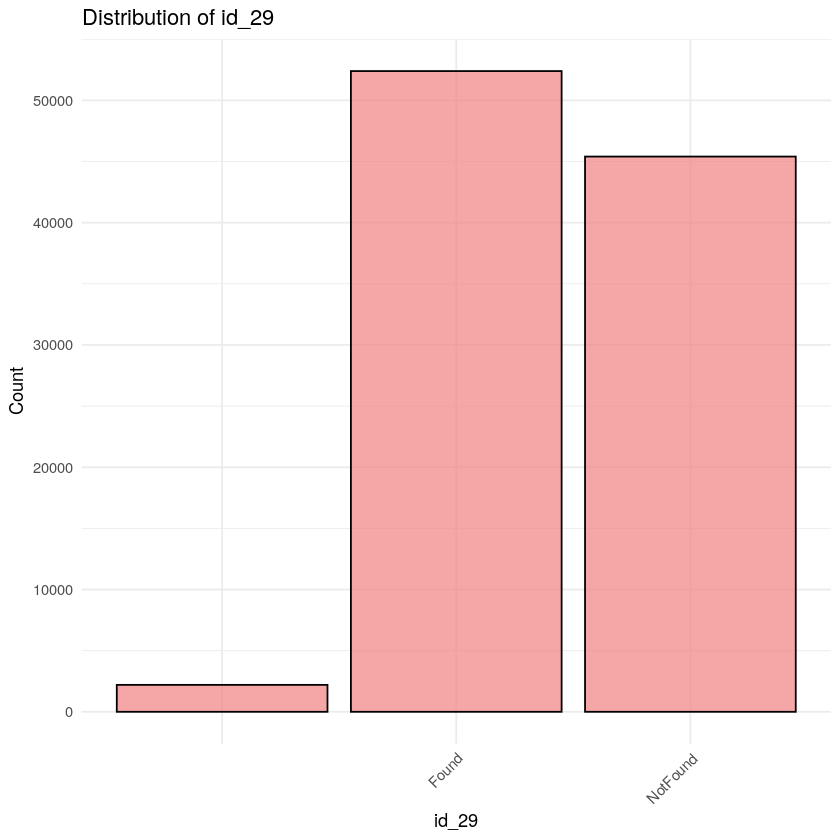


 id_31 :
Unique values: 129 
Top 10 most frequent values:

            chrome 63.0      mobile safari 11.0   mobile safari generic 
                  15182                    9117                    8003 
    ie 11.0 for desktop          safari generic             chrome 62.0 
                   6122                    5579                    4854 
            chrome 65.0             chrome 64.0 chrome 63.0 for android 
                   4824                    4608                    4131 
         chrome generic 
                   3409 

 id_33 :
Unique values: 233 
Top 10 most frequent values:

          1920x1080  1366x768  1334x750 2208x1242  1440x900  1600x900 2048x1536 
    50109     11461      5906      4377      3379      2989      2394      2360 
 1280x800 2560x1600 
     1477      1387 

 id_34 :
Unique values: 5 

                match_status:-1  match_status:0  match_status:1  match_status:2 
          47001               3             288           11842           4086

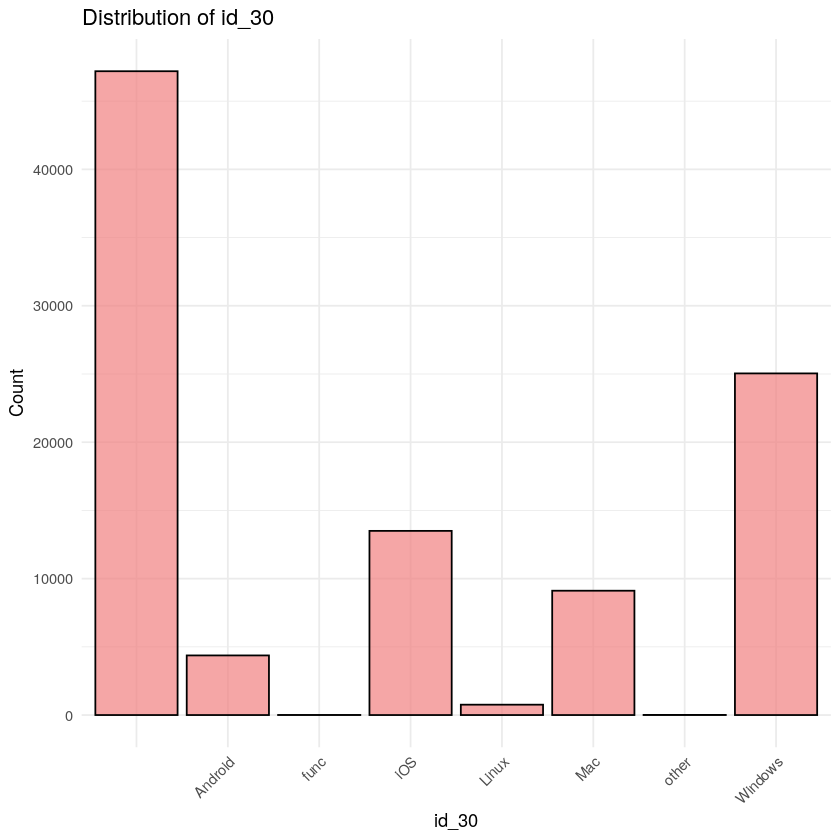


 id_35 :
Unique values: 3 

FALSE  TRUE 
44814 52990 


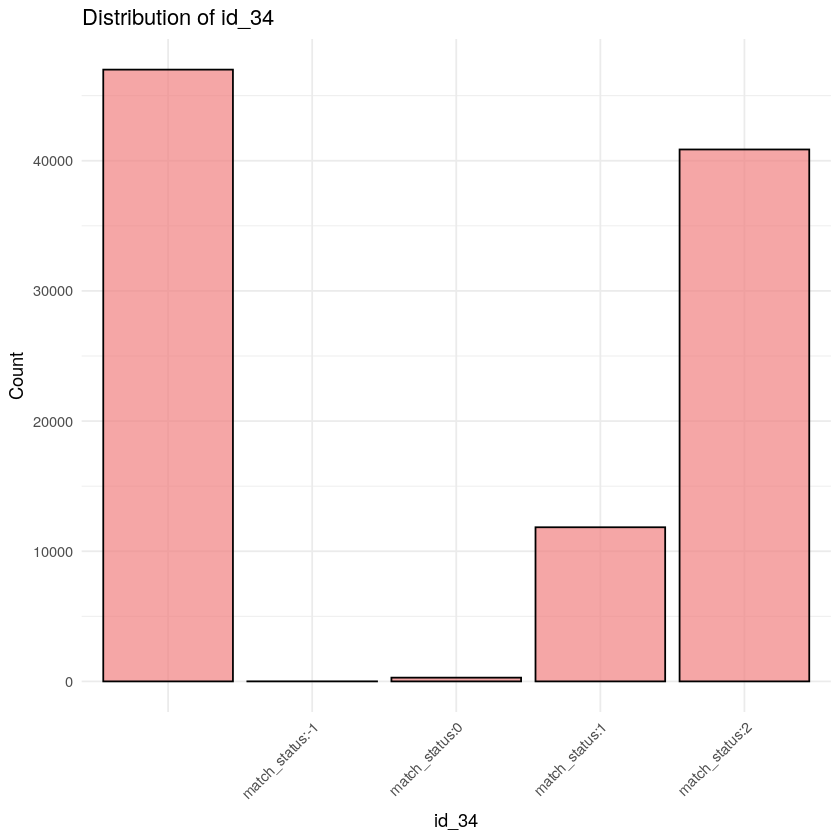


 id_36 :
Unique values: 3 

FALSE  TRUE 
93074  4730 


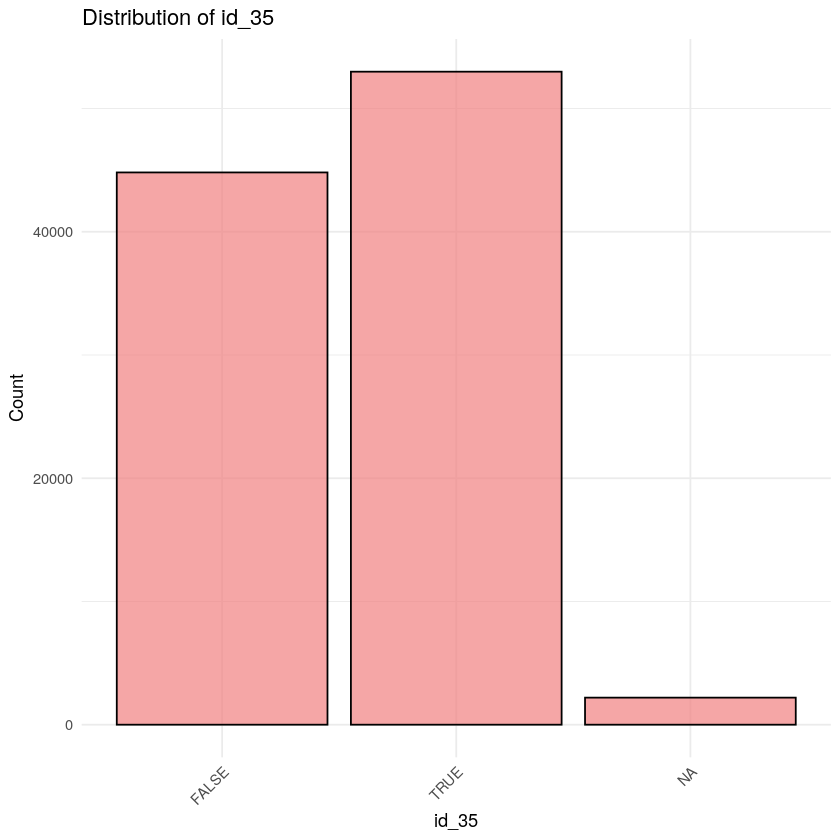


 id_37 :
Unique values: 3 

FALSE  TRUE 
20964 76840 


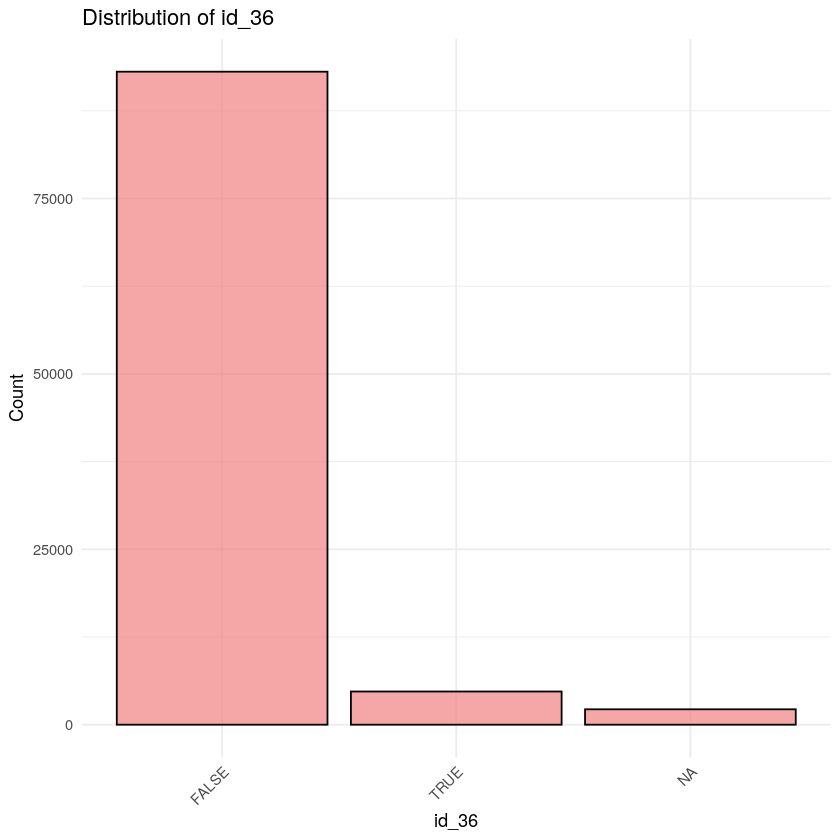


 id_38 :
Unique values: 3 

FALSE  TRUE 
51740 46064 


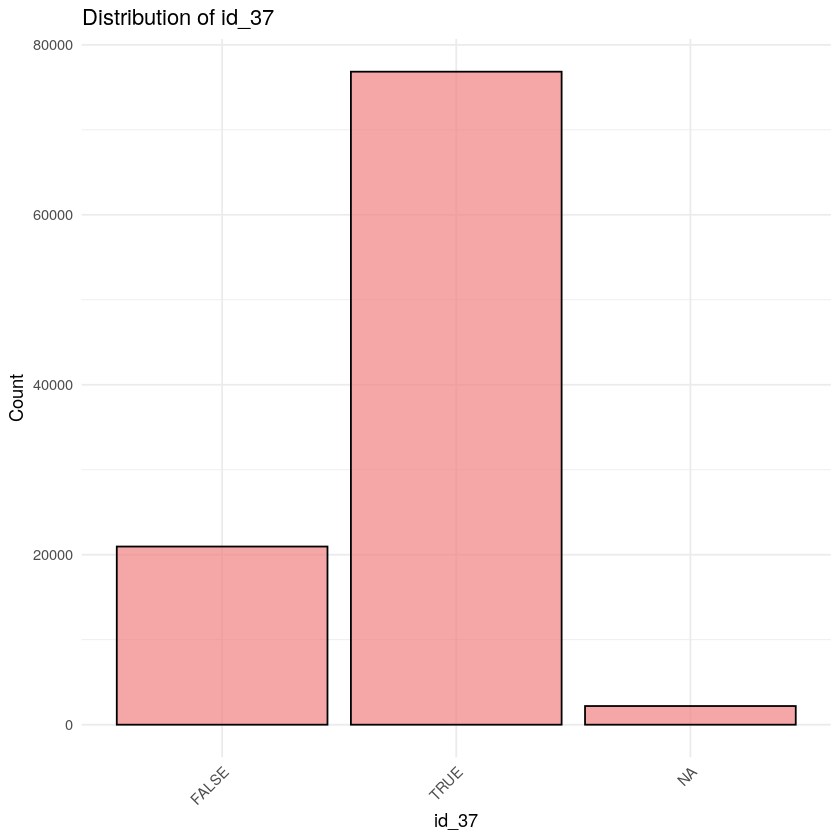


 DevType :
Unique values: 3 

        desktop  mobile 
   2315   58732   38953 


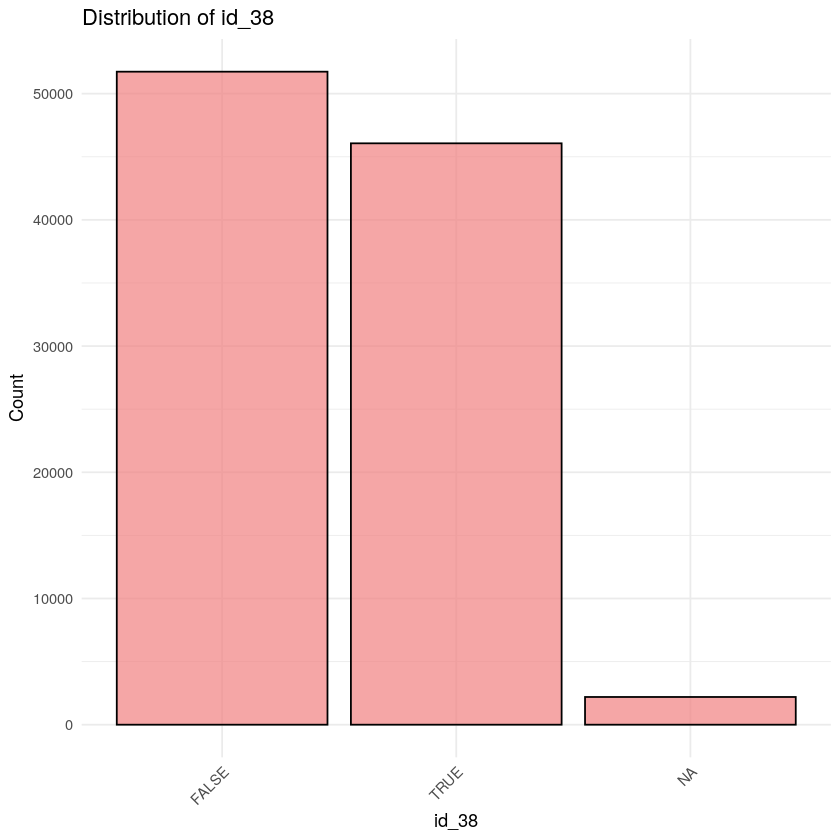


 DevInfo :
Unique values: 1637 
Top 10 most frequent values:

              Windows                                  iOS Device 
                32851                 17959                 13500 
                MacOS           Trident/7.0               rv:11.0 
                 8435                  5030                  1309 
              rv:57.0 SM-J700M Build/MMB29K SM-G610M Build/MMB29K 
                  680                   372                   330 
SM-G531H Build/LMY48B 
                  279 


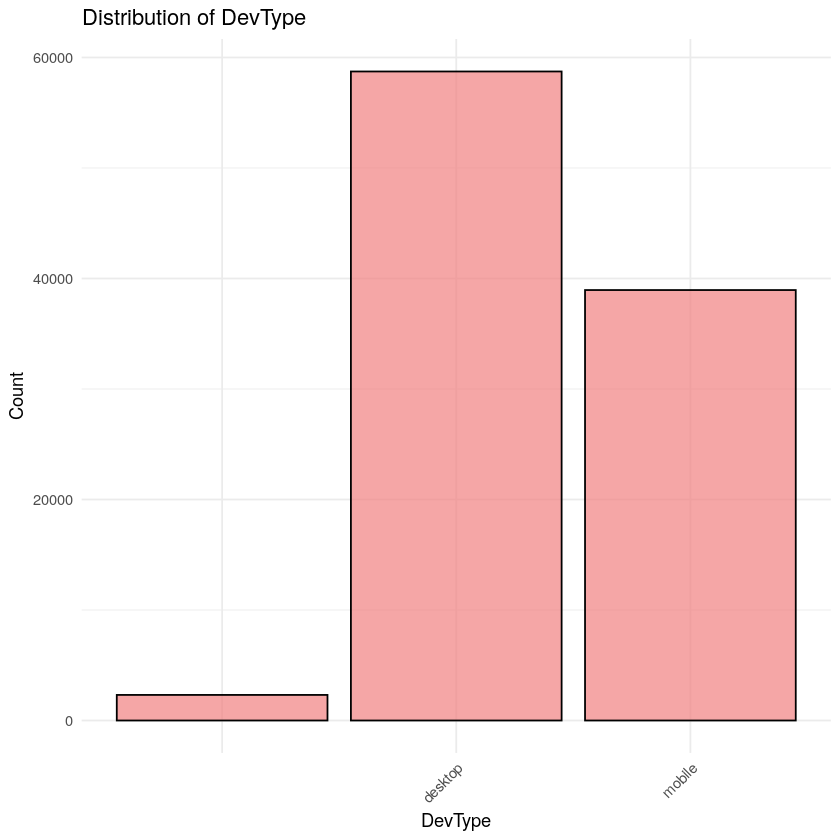

In [ ]:
# 3.3 Categorical Variables Analysis ----------------------------------------
if(length(categorical_vars) > 0) {
  cat("Categorical Variables Summary:\n")
  
  for(var in categorical_vars) {
    cat("\n", var, ":\n")
    freq_table <- table(data[[var]])
    cat("Unique values:", length(unique(data[[var]])), "\n")
    
    # Show frequency table (top 10 if too many categories)
    if(length(freq_table) <= 10) {
      print(freq_table)
    } else {
      cat("Top 10 most frequent values:\n")
      print(head(sort(freq_table, decreasing = TRUE), 10))
    }
    
    # Create bar plot for categorical variables with reasonable number of categories
    if(length(unique(data[[var]])) <= 15) {
      p <- ggplot(data, aes_string(x = var)) +
        geom_bar(fill = "lightcoral", color = "black", alpha = 0.7) +
        labs(title = paste("Distribution of", var), x = var, y = "Count") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))
      print(p)
    }
  }
}

## 4. Bivariate Analysis

In [ ]:
# 4.1 Correlation Analysis (Numeric Variables) ------------------------------
if(length(numeric_vars) > 1) {
  # Filter out variables that are mostly missing (>95% missing)
  numeric_usable <- c()
  for(var in numeric_vars) {
    missing_pct <- sum(is.na(data[[var]])) / nrow(data)
    if(missing_pct < 0.95) {  # Keep variables with less than 95% missing
      numeric_usable <- c(numeric_usable, var)
    }
  }
  
  cat("Numeric variables with <95% missing data:", length(numeric_usable), "out of", length(numeric_vars), "\n")
  cat("Variables:", paste(numeric_usable, collapse = ", "), "\n\n")
  
  if(length(numeric_usable) > 1) {
    # Calculate correlation matrix for usable variables
    tryCatch({
      cor_data <- data %>% select(all_of(numeric_usable))
      cor_matrix <- cor(cor_data, use = "pairwise.complete.obs")
      
      cat("Correlation Matrix:\n")
      print(round(cor_matrix, 3))
      
      # Check if we have valid correlations
      if(!all(is.na(cor_matrix))) {
        # Visualize correlation matrix
        corrplot(cor_matrix, method = "color", type = "upper", 
                 order = "hclust", tl.cex = 0.8, tl.col = "black",
                 addCoef.col = "black", number.cex = 0.7,
                 title = "Correlation Matrix of Numeric Variables",
                 mar = c(0,0,1,0))
        
        # Identify highly correlated pairs
        high_cor_pairs <- which(abs(cor_matrix) > 0.7 & cor_matrix != 1, arr.ind = TRUE)
        if(nrow(high_cor_pairs) > 0) {
          cat("\nHighly Correlated Pairs (|correlation| > 0.7):\n")
          for(i in 1:nrow(high_cor_pairs)) {
            var1 <- rownames(cor_matrix)[high_cor_pairs[i,1]]
            var2 <- colnames(cor_matrix)[high_cor_pairs[i,2]]
            cor_val <- cor_matrix[high_cor_pairs[i,1], high_cor_pairs[i,2]]
            cat(var1, "vs", var2, ":", round(cor_val, 3), "\n")
          }
        } else {
          cat("\nNo highly correlated pairs found (|correlation| > 0.7)\n")
        }
      } else {
        cat("Unable to calculate meaningful correlations.\n")
      }
    }, error = function(e) {
      cat("Error in correlation analysis:", e$message, "\n")
    })
  } else if(length(numeric_usable) == 1) {
    cat("Only one numeric variable with sufficient data. Correlation analysis requires at least 2 variables.\n")
  } else {
    cat("No numeric variables with sufficient data for correlation analysis.\n")
  }
} else {
  cat("Insufficient numeric variables for correlation analysis.\n")
}

Numeric variables with <95% missing data: 61 out of 68 
Variables: TxnID, isFraud, TxnDT, TxnDTHour, TxnAmt, addr1, addr2, dist2, card1, card2, card3, card5, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, D1, D2, D3, D4, D5, D6, D7, D8, D9, D10, D12, D13, D14, D15, V310, V311, V312, V313, V314, id_01, id_02, id_03, id_04, id_05, id_06, id_09, id_10, id_11, id_13, id_14, id_17, id_18, id_19, id_20, id_32 



Warning message in cor(cor_data, use = "pairwise.complete.obs"):
“the standard deviation is zero”


Correlation Matrix:
           TxnID isFraud  TxnDT TxnDTHour TxnAmt  addr1  addr2  dist2  card1
TxnID      1.000   0.111  0.998     0.998 -0.104  0.025  0.041 -0.031  0.024
isFraud    0.111   1.000  0.107     0.107  0.018  0.003  0.032 -0.022 -0.040
TxnDT      0.998   0.107  1.000     1.000 -0.102  0.025  0.037 -0.031  0.025
TxnDTHour  0.998   0.107  1.000     1.000 -0.102  0.025  0.037 -0.031  0.025
TxnAmt    -0.104   0.018 -0.102    -0.102  1.000 -0.010  0.063  0.026 -0.021
addr1      0.025   0.003  0.025     0.025 -0.010  1.000  0.087 -0.003  0.032
addr2      0.041   0.032  0.037     0.037  0.063  0.087  1.000 -0.009 -0.020
dist2     -0.031  -0.022 -0.031    -0.031  0.026 -0.003 -0.009  1.000  0.001
card1      0.024  -0.040  0.025     0.025 -0.021  0.032 -0.020  0.001  1.000
card2     -0.009  -0.067 -0.009    -0.009  0.039  0.007 -0.028  0.011  0.019
card3      0.158   0.174  0.152     0.152 -0.264  0.013 -0.158 -0.141  0.009
card5     -0.091  -0.055 -0.090    -0.090  0.019 -0.007 

Creating scatter plots for 68 numeric variables with data
Too many variables ( 68 ) for scatter plot matrix. Consider selecting key variables.

Creating individual scatter plot for: TxnID vs isFraud 


`geom_smooth()` using formula = 'y ~ x'



Note: Customize scatter plots based on your specific variables and research questions.


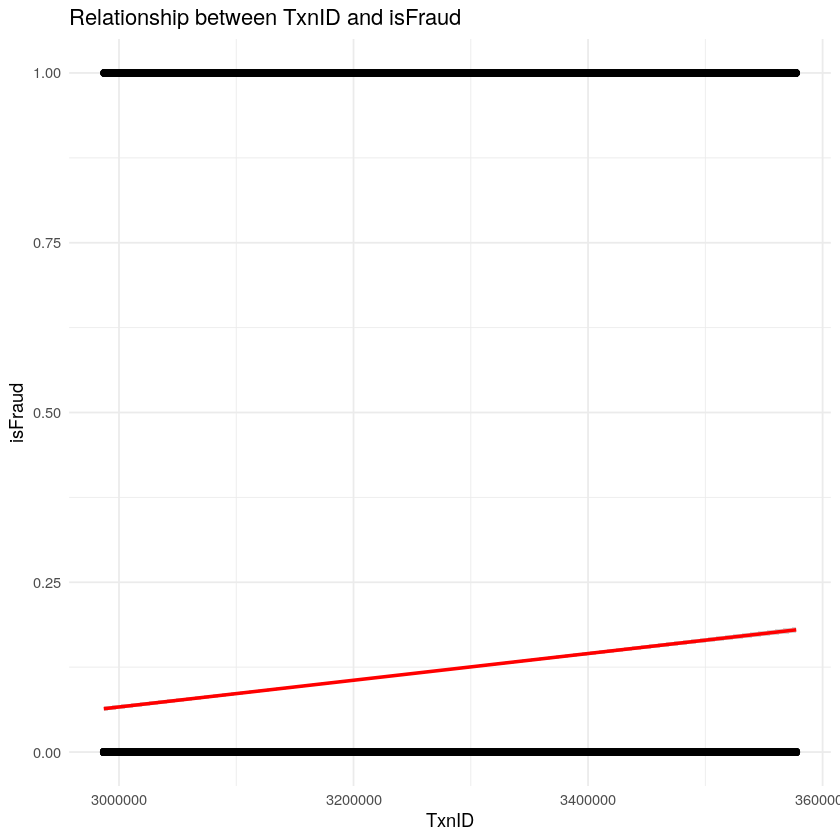

In [ ]:
# 4.2 Scatter Plots for Key Relationships ----------------------------------
if(length(numeric_vars) > 1) {
  # Use only numeric variables with available data
  numeric_complete <- data %>%
    select(all_of(numeric_vars)) %>%
    select_if(~sum(!is.na(.)) > 1)
  
  if(ncol(numeric_complete) > 1) {
    cat("Creating scatter plots for", ncol(numeric_complete), "numeric variables with data\n")
    
    # Create scatter plot matrix for numeric variables with data
    if(ncol(numeric_complete) <= 5) {  # Only if manageable number of variables
      tryCatch({
        pairs(numeric_complete, 
              main = "Scatter Plot Matrix of Numeric Variables",
              pch = 16, col = alpha("blue", 0.6))
      }, error = function(e) {
        cat("Error creating scatter plot matrix:", e$message, "\n")
      })
    } else {
      cat("Too many variables (", ncol(numeric_complete), ") for scatter plot matrix. Consider selecting key variables.\n")
    }
    
    # Example: Create individual scatter plots for first few variable pairs
    var_names <- names(numeric_complete)
    if(length(var_names) >= 2) {
      cat("\nCreating individual scatter plot for:", var_names[1], "vs", var_names[2], "\n")
      tryCatch({
        p <- ggplot(data, aes_string(x = var_names[1], y = var_names[2])) +
          geom_point(alpha = 0.6) +
          geom_smooth(method = "lm", se = TRUE, color = "red") +
          labs(title = paste("Relationship between", var_names[1], "and", var_names[2]),
               x = var_names[1], y = var_names[2]) +
          theme_minimal()
        print(p)
      }, error = function(e) {
        cat("Error creating scatter plot:", e$message, "\n")
      })
    }
  } else {
    cat("Insufficient numeric variables with data for scatter plot analysis.\n")
  }
  
  cat("\nNote: Customize scatter plots based on your specific variables and research questions.\n")
}

In [ ]:
# 4.3 Cross-tabulation Analysis (Categorical Variables) -------------------
if(length(categorical_vars) > 1) {
  cat("Cross-tabulation Analysis:\n")
  
  # Filter categorical variables with reasonable number of categories and data
  cat_usable <- c()
  for(var in categorical_vars) {
    unique_vals <- length(unique(data[[var]][!is.na(data[[var]])]))
    missing_pct <- sum(is.na(data[[var]])) / nrow(data)
    if(unique_vals > 1 && unique_vals <= 20 && missing_pct < 0.95) {
      cat_usable <- c(cat_usable, var)
    }
  }
  
  cat("Categorical variables suitable for analysis:", length(cat_usable), "\n")
  cat("Variables:", paste(cat_usable, collapse = ", "), "\n\n")
  
  if(length(cat_usable) > 1) {
    # Limit to first few pairs to avoid too much output
    max_pairs <- min(3, length(cat_usable))
    
    for(i in 1:(max_pairs-1)) {
      for(j in (i+1):max_pairs) {
        var1 <- cat_usable[i]
        var2 <- cat_usable[j]
        
        cat("\n", var1, "vs", var2, ":\n")
        
        # Create cross-tabulation with error handling
        tryCatch({
          cross_tab <- table(data[[var1]], data[[var2]], useNA = "ifany")
          
          if(sum(cross_tab) > 0) {
            print(cross_tab)
            
            # Chi-square test for independence
            if(all(cross_tab >= 5) && nrow(cross_tab) > 1 && ncol(cross_tab) > 1) {
              chi_test <- chisq.test(cross_tab)
              cat("Chi-square test p-value:", round(chi_test$p.value, 4), "\n")
              if(chi_test$p.value < 0.05) {
                cat("Variables appear to be significantly associated (p < 0.05)\n")
              }
            } else {
              cat("Note: Chi-square test not applicable (cells with count < 5 or insufficient variation)\n")
            }
          } else {
            cat("No data available for cross-tabulation\n")
          }
        }, error = function(e) {
          cat("Error in cross-tabulation:", e$message, "\n")
        })
      }
    }
  } else {
    cat("Insufficient categorical variables with suitable data for cross-tabulation analysis.\n")
  }
} else {
  cat("Insufficient categorical variables for cross-tabulation analysis.\n")
}

Cross-tabulation Analysis:
Categorical variables suitable for analysis: 20 
Variables: ProductCD, card4, card6, P_emaildomain, R_emaildomain, M4, id_12, id_15, id_16, id_23, id_27, id_28, id_29, id_30, id_34, id_35, id_36, id_37, id_38, DevType 


 ProductCD vs card4 :
    
           american express discover mastercard  visa
  AD     0              434      398       2750  4357
  LY   116                2        0      17546 26468
  TP     6             1076      416       5357 15551
  WF     1             4127      738       5027 15630
Note: Chi-square test not applicable (cells with count < 5 or insufficient variation)

 ProductCD vs card6 :
    
           charge card credit debit
  AD     0           0   4456  3483
  LY   115           7  17816 26194
  TP     0           0  12076 10330
  WF     3           2  17930  7588
Note: Chi-square test not applicable (cells with count < 5 or insufficient variation)

 card4 vs card6 :
                  
                         charge card 

## 5. Feature Engineering and Data Preparation

Based on EDA findings, we can create new variables and prepare data for modeling.

In [ ]:
# 5.1 Create New Variables Based on Domain Knowledge ----------------------
# Example feature engineering (customize based on your data)

# If you have datetime variables
# data <- data %>%
#   mutate(
#     hour_of_day = hour(transaction_time),
#     day_of_week = wday(transaction_time),
#     is_weekend = wday(transaction_time) %in% c(1, 7)
#   )

# If you have amount variables
# data <- data %>%
#   mutate(
#     amount_category = case_when(
#       amount < 100 ~ "Small",
#       amount < 1000 ~ "Medium",
#       amount >= 1000 ~ "Large"
#     ),
#     is_round_amount = amount %% 1 == 0,
#     log_amount = log(amount + 1)  # Add 1 to handle zero values
#   )

# Flag potential outliers based on EDA findings
for(var in numeric_vars) {
  Q1 <- quantile(data[[var]], 0.25, na.rm = TRUE)
  Q3 <- quantile(data[[var]], 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  
  outlier_col <- paste0(var, "_outlier")
  data[[outlier_col]] <- data[[var]] < lower_bound | data[[var]] > upper_bound
}

cat("Feature engineering completed. New variables created based on outlier detection.\n")
cat("Customize the commented code above based on your specific variables.\n")

Feature engineering completed. New variables created based on outlier detection.
Customize the commented code above based on your specific variables.
Customize the commented code above based on your specific variables.


## 6. Summary and Key Insights

Summarize the key findings from your exploratory data analysis.

In [ ]:
# 6.1 EDA Summary Report ---------------------------------------------------
cat("=== EXPLORATORY DATA ANALYSIS SUMMARY ===\n\n")

cat("Dataset Overview:\n")
cat("- Total observations:", nrow(data), "\n")
cat("- Total variables:", ncol(data), "\n")
cat("- Numeric variables:", length(numeric_vars), "\n")
cat("- Categorical variables:", length(categorical_vars), "\n\n")

cat("Data Quality:\n")
total_missing <- sum(is.na(data))
cat("- Total missing values:", total_missing, "\n")
cat("- Missing value percentage:", round(total_missing / (nrow(data) * ncol(data)) * 100, 2), "%\n")
cat("- Duplicate rows:", sum(duplicated(data)), "\n\n")

cat("Key Findings:\n")
cat("1. [Describe your main finding about the data distribution]\n")
cat("2. [Describe any interesting patterns or relationships]\n")
cat("3. [Mention any data quality issues discovered]\n")
cat("4. [Highlight any outliers or anomalies]\n")
cat("5. [Note any variables that may need transformation]\n\n")

cat("Recommendations for Next Steps:\n")
cat("- [Based on your EDA, what modeling approaches would be appropriate?]\n")
cat("- [What data preprocessing steps are needed?]\n")
cat("- [Are there any variables that should be excluded or transformed?]\n")
cat("- [What additional data might be helpful?]\n\n")

cat("=== END OF EDA SUMMARY ===\n")

=== EXPLORATORY DATA ANALYSIS SUMMARY ===

Dataset Overview:
- Total observations: 100000 
- Total variables: 169 
- Numeric variables: 68 
- Categorical variables: 33 

Dataset Overview:
- Total observations: 100000 
- Total variables: 169 
- Numeric variables: 68 
- Categorical variables: 33 

Data Quality:
Data Quality:
- Total missing values: 5050270 
- Missing value percentage: 29.88 %
- Total missing values: 5050270 
- Missing value percentage: 29.88 %
- Duplicate rows: 0 

Key Findings:
1. [Describe your main finding about the data distribution]
2. [Describe any interesting patterns or relationships]
3. [Mention any data quality issues discovered]
4. [Highlight any outliers or anomalies]
- Duplicate rows: 0 

Key Findings:
1. [Describe your main finding about the data distribution]
2. [Describe any interesting patterns or relationships]
3. [Mention any data quality issues discovered]
4. [Highlight any outliers or anomalies]
5. [Note any variables that may need transformation]

R